In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import TensorFlow and other libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import PIL
import re
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

# Import and explore dataset

In [ ]:
data_dir = '/content/drive/Shareddrives/Meng-emel/food-101 data'
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

9000


## Bread Pudding

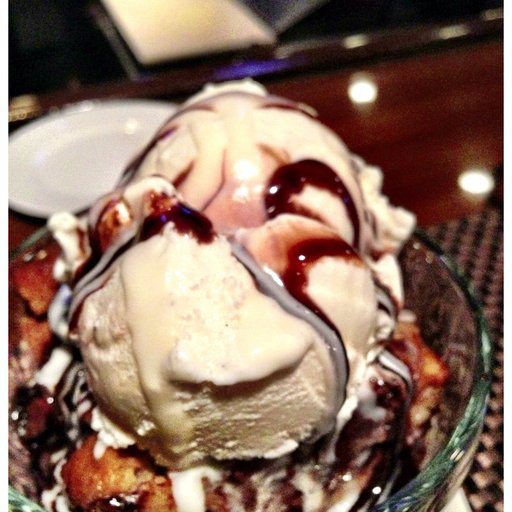

In [ ]:
bread_pudding = list(data_dir.glob('bread_pudding/*'))
PIL.Image.open(str(bread_pudding[0]))

## Chicken Curry

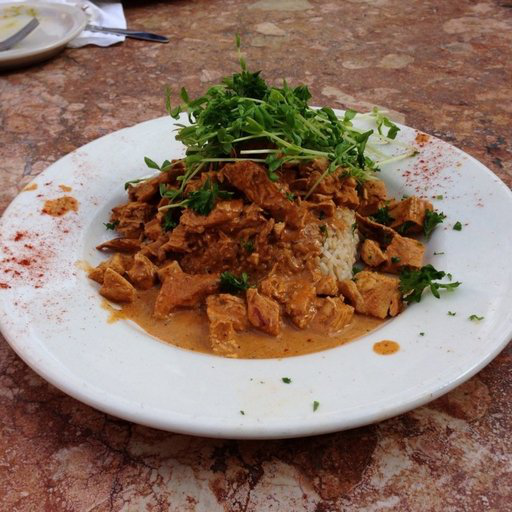

In [ ]:
chicken_curry = list(data_dir.glob('chicken_curry/*'))
PIL.Image.open(str(chicken_curry[0]))

## Donuts

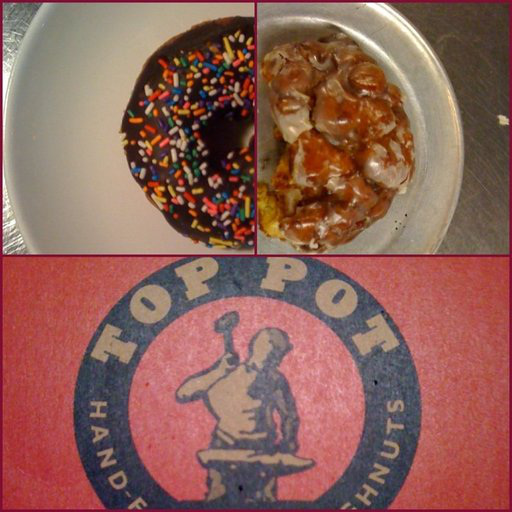

In [ ]:
donuts = list(data_dir.glob('donuts/*'))
PIL.Image.open(str(donuts[0]))

## Garlic Bread

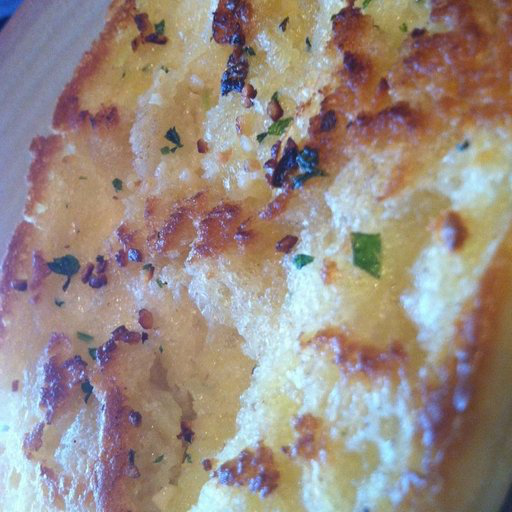

In [ ]:
garlic_bread = list(data_dir.glob('garlic_bread/*'))
PIL.Image.open(str(garlic_bread[0]))

## Gnocchi

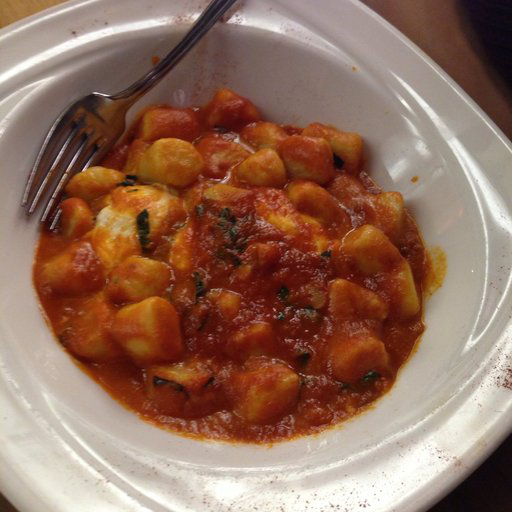

In [ ]:
gnocchi = list(data_dir.glob('gnocchi/*'))
PIL.Image.open(str(gnocchi[0]))

## Samosa

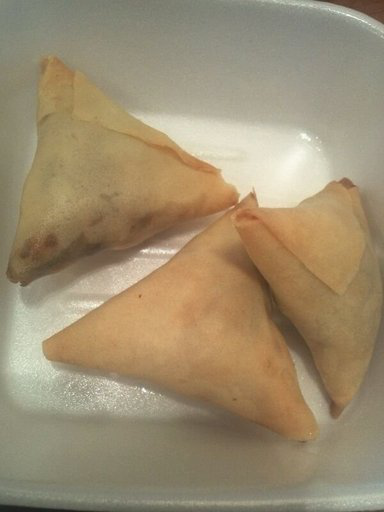

In [ ]:
samosa = list(data_dir.glob('samosa/*'))
PIL.Image.open(str(samosa[0]))

## Sashimi

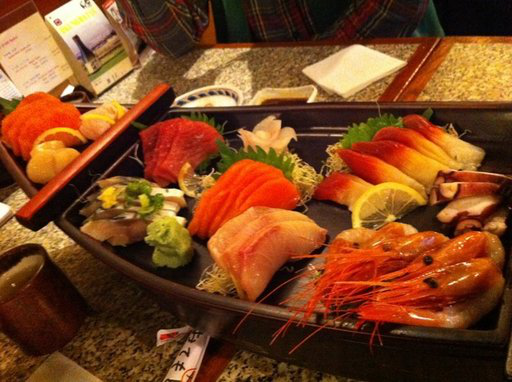

In [ ]:
sashimi = list(data_dir.glob('sashimi/*'))
PIL.Image.open(str(sashimi[0]))

## Seaweed Salad

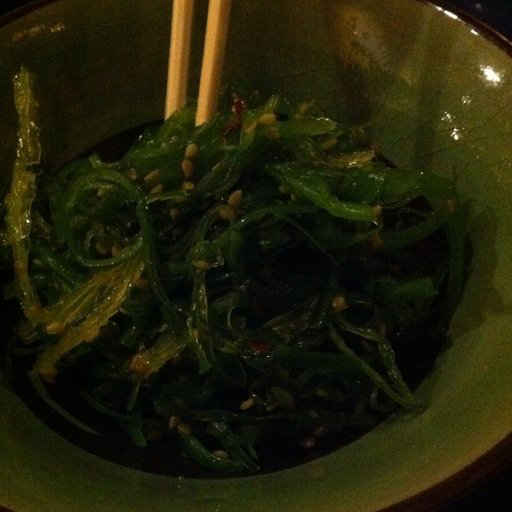

In [ ]:
seaweed_salad = list(data_dir.glob('seaweed_salad/*'))
PIL.Image.open(str(seaweed_salad[0]))

## Spaghetti Carbonara

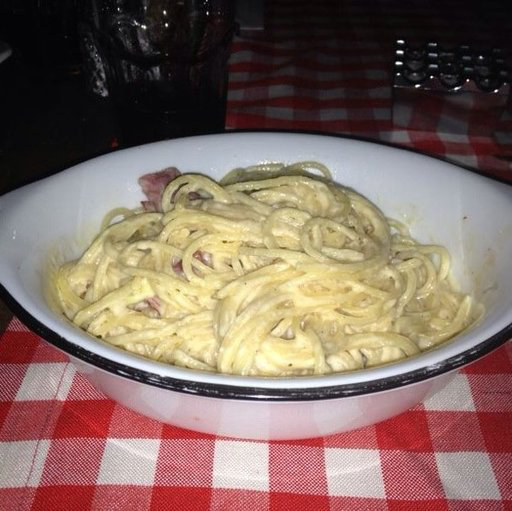

In [ ]:
spaghetti_carbonara = list(data_dir.glob('spaghetti_carbonara/*'))
PIL.Image.open(str(spaghetti_carbonara[0]))

## Takoyaki

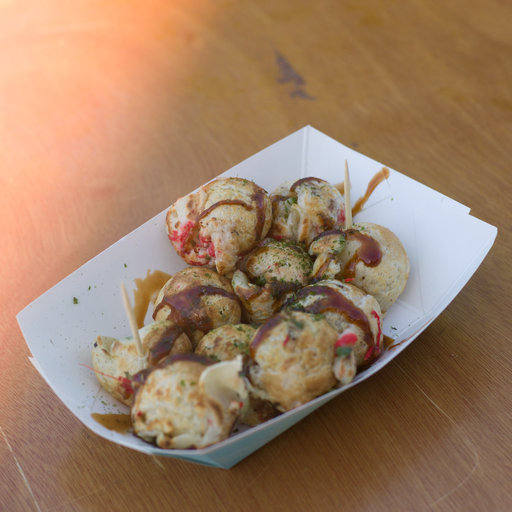

In [ ]:
takoyaki = list(data_dir.glob('takoyaki/*'))
PIL.Image.open(str(takoyaki[0]))

# Load Data

Dari 10000 data, 8000 training, 1000 validation, 1000 testing.

In [ ]:
batch_size = 32
img_height = 128
img_width = 128

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1112,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9000 files belonging to 10 classes.
Using 8000 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1112,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9000 files belonging to 10 classes.
Using 1000 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bread_pudding', 'chicken_curry', 'donuts', 'garlic_bread', 'gnocchi', 'samosa', 'sashimi', 'seaweed_salad', 'spaghetti_carbonara', 'takoyaki']


# Visualize Data

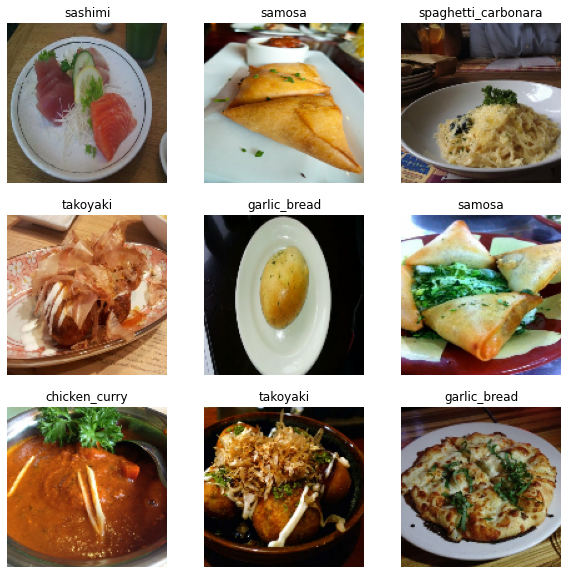

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
  ]
)

# Create Test Model

In [ ]:
num_classes = len(class_names)

In [ ]:
coba = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile Model

In [ ]:
coba.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

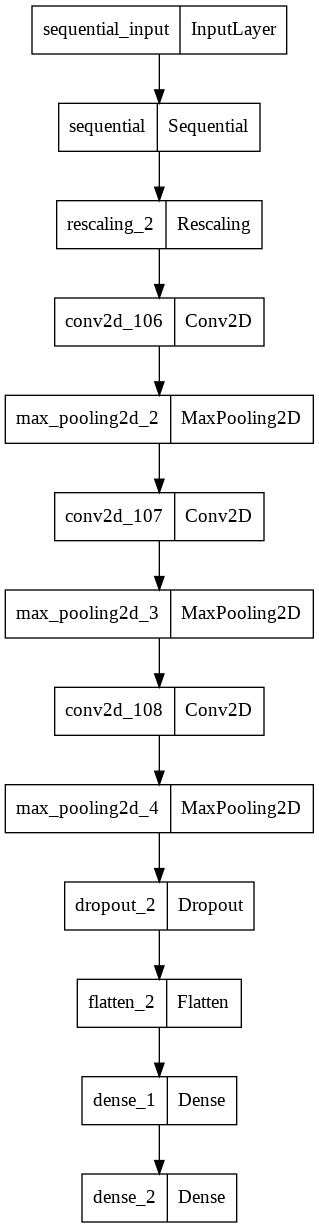

In [ ]:
plot_model(coba)

## Test Model Summary

In [ ]:
coba.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                  

## Train Model

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('/content/drive/Shareddrives/Meng-emel/best_cobaModel.h5', monitor='val_loss', mode='min')
CobaModel = coba.fit(train_ds, validation_data=val_ds, epochs=100, verbose=1, callbacks=[mc,es])

Epoch 1/100
250/250 [==============================] - 652s 342ms/step - loss: 2.0522 - accuracy: 0.2418 - val_loss: 1.9838 - val_accuracy: 0.3260
Epoch 2/100
250/250 [==============================] - 4s 17ms/step - loss: 1.8215 - accuracy: 0.3459 - val_loss: 1.8766 - val_accuracy: 0.3550
Epoch 3/100
250/250 [==============================] - 4s 15ms/step - loss: 1.7225 - accuracy: 0.3969 - val_loss: 1.8044 - val_accuracy: 0.3910
Epoch 4/100
250/250 [==============================] - 4s 15ms/step - loss: 1.6750 - accuracy: 0.4078 - val_loss: 1.7102 - val_accuracy: 0.4000
Epoch 5/100
250/250 [==============================] - 4s 15ms/step - loss: 1.6106 - accuracy: 0.4313 - val_loss: 1.7356 - val_accuracy: 0.4280
Epoch 6/100
250/250 [==============================] - 4s 15ms/step - loss: 1.5575 - accuracy: 0.4596 - val_loss: 1.8174 - val_accuracy: 0.4100
Epoch 7/100
250/250 [==============================] - 4s 15ms/step - loss: 1.5206 - accuracy: 0.4679 - val_loss: 1.6607 - val_accura

## Train Result

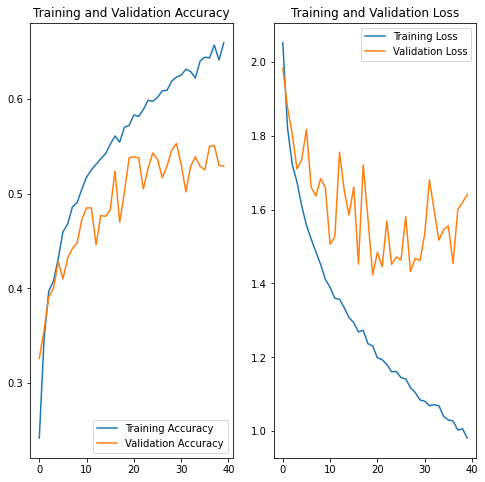

In [ ]:
acc = CobaModel.history['accuracy']
val_acc = CobaModel.history['val_accuracy']

loss = CobaModel.history['loss']
val_loss = CobaModel.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save Coba Model

In [ ]:
coba.save('/content/drive/Shareddrives/Meng-emel/saved_model/coba_model.h5')

# Load Coba Model

In [ ]:
coba = tf.keras.models.load_model('/content/drive/Shareddrives/Meng-emel/saved_model/coba_model.h5')

# Test Coba Model

In [ ]:
test_path = '/content/drive/Shareddrives/Meng-emel/testing data/'
test_images = list(pathlib.Path(test_path).glob('*.jpg'))

coba_y_pred = []
coba_y_true = []

for i in range(len(test_images)):
  img = tf.keras.utils.load_img(
      str(test_images[i]), target_size=(img_height, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = coba.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  filename = str(test_images[i])[51:]

  print(
      "The image '{}' most likely belongs to {} with a {:.2f} percent confidence."
      .format(filename, class_names[np.argmax(score)], 100 * np.max(score))
  )

  coba_y_pred.append(class_names[np.argmax(score)])
  coba_y_true.append(re.sub(r'_[0-9]+.jpg', '', filename))

The image 'chicken_curry_128873.jpg' most likely belongs to seaweed_salad with a 91.55 percent confidence.
The image 'chicken_curry_2031782.jpg' most likely belongs to garlic_bread with a 73.08 percent confidence.
The image 'chicken_curry_2679600.jpg' most likely belongs to sashimi with a 83.88 percent confidence.
The image 'chicken_curry_3572372.jpg' most likely belongs to takoyaki with a 59.46 percent confidence.
The image 'chicken_curry_415039.jpg' most likely belongs to sashimi with a 46.31 percent confidence.
The image 'chicken_curry_1857870.jpg' most likely belongs to takoyaki with a 66.23 percent confidence.
The image 'chicken_curry_1615877.jpg' most likely belongs to takoyaki with a 38.89 percent confidence.
The image 'chicken_curry_2096438.jpg' most likely belongs to chicken_curry with a 48.56 percent confidence.
The image 'chicken_curry_656500.jpg' most likely belongs to chicken_curry with a 68.21 percent confidence.
The image 'chicken_curry_1621613.jpg' most likely belongs t

## Confidence

|File Name|Predicted Class|Actual Class|Confidence| 
|:-----:|:-----------:|:-----------:|:----------:|
| 'chicken_curry_128873.jpg' | seaweed_salad | chicken_curry | 91.55 |
| 'chicken_curry_2031782.jpg' | garlic_bread | chicken_curry | 73.08 |
| 'chicken_curry_2679600.jpg' | sashimi | chicken_curry | 83.88 |
| 'chicken_curry_3572372.jpg' | takoyaki | chicken_curry | 59.46 |
| 'chicken_curry_415039.jpg' | sashimi | chicken_curry | 46.31 |
| 'chicken_curry_1857870.jpg' | takoyaki | chicken_curry | 66.23 |
| 'chicken_curry_1615877.jpg' | takoyaki | chicken_curry | 38.89 |
| 'chicken_curry_2096438.jpg' | chicken_curry | chicken_curry | 48.56 |
| 'chicken_curry_656500.jpg' | chicken_curry | chicken_curry | 68.21 |
| 'chicken_curry_1621613.jpg' | takoyaki | chicken_curry | 61.60 |
| 'chicken_curry_2049685.jpg' | donuts | chicken_curry | 74.16 |
| 'chicken_curry_3064522.jpg' | chicken_curry | chicken_curry | 93.11 |
| 'chicken_curry_2956788.jpg' | chicken_curry | chicken_curry | 98.16 |
| 'chicken_curry_1623603.jpg' | chicken_curry | chicken_curry | 82.61 |
| 'chicken_curry_2408036.jpg' | chicken_curry | chicken_curry | 77.99 |
| 'chicken_curry_2283627.jpg' | donuts | chicken_curry | 39.84 |
| 'chicken_curry_1179201.jpg' | gnocchi | chicken_curry | 65.73 |
| 'chicken_curry_1234505.jpg' | chicken_curry | chicken_curry | 44.30 |
| 'chicken_curry_1147844.jpg' | chicken_curry | chicken_curry | 40.74 |
| 'chicken_curry_636631.jpg' | donuts | chicken_curry | 53.60 |
| 'chicken_curry_627128.jpg' | gnocchi | chicken_curry | 57.45 |
| 'chicken_curry_1757433.jpg' | chicken_curry | chicken_curry | 85.51 |
| 'chicken_curry_99631.jpg' | takoyaki | chicken_curry | 48.27 |
| 'chicken_curry_202169.jpg' | chicken_curry | chicken_curry | 65.48 |
| 'chicken_curry_3066535.jpg' | takoyaki | chicken_curry | 86.10 |
| 'chicken_curry_181852.jpg' | gnocchi | chicken_curry | 76.35 |
| 'chicken_curry_1237705.jpg' | seaweed_salad | chicken_curry | 86.67 |
| 'chicken_curry_1750242.jpg' | donuts | chicken_curry | 43.97 |
| 'chicken_curry_1303435.jpg' | donuts | chicken_curry | 92.04 |
| 'chicken_curry_2129466.jpg' | chicken_curry | chicken_curry | 95.18 |
| 'chicken_curry_3050643.jpg' | sashimi | chicken_curry | 67.28 |
| 'chicken_curry_2681181.jpg' | chicken_curry | chicken_curry | 40.84 |
| 'chicken_curry_68606.jpg' | donuts | chicken_curry | 85.15 |
| 'chicken_curry_3506313.jpg' | takoyaki | chicken_curry | 49.38 |
| 'chicken_curry_2144449.jpg' | sashimi | chicken_curry | 71.21 |
| 'chicken_curry_1441189.jpg' | chicken_curry | chicken_curry | 99.00 |
| 'chicken_curry_108559.jpg' | chicken_curry | chicken_curry | 91.57 |
| 'chicken_curry_3578703.jpg' | chicken_curry | chicken_curry | 94.59 |
| 'chicken_curry_3539345.jpg' | chicken_curry | chicken_curry | 69.67 |
| 'chicken_curry_3307194.jpg' | donuts | chicken_curry | 61.34 |
| 'chicken_curry_1588422.jpg' | chicken_curry | chicken_curry | 29.72 |
| 'chicken_curry_2350467.jpg' | donuts | chicken_curry | 67.04 |
| 'chicken_curry_2011230.jpg' | seaweed_salad | chicken_curry | 98.76 |
| 'chicken_curry_2322720.jpg' | garlic_bread | chicken_curry | 31.23 |
| 'chicken_curry_95561.jpg' | donuts | chicken_curry | 38.11 |
| 'chicken_curry_1004867.jpg' | chicken_curry | chicken_curry | 84.22 |
| 'chicken_curry_148528.jpg' | takoyaki | chicken_curry | 45.38 |
| 'chicken_curry_3202622.jpg' | takoyaki | chicken_curry | 85.95 |
| 'chicken_curry_1165404.jpg' | chicken_curry | chicken_curry | 67.67 |
| 'chicken_curry_2755111.jpg' | chicken_curry | chicken_curry | 38.89 |
| 'chicken_curry_3047106.jpg' | chicken_curry | chicken_curry | 97.47 |
| 'chicken_curry_2181212.jpg' | chicken_curry | chicken_curry | 96.99 |
| 'chicken_curry_404095.jpg' | takoyaki | chicken_curry | 26.03 |
| 'chicken_curry_762359.jpg' | chicken_curry | chicken_curry | 86.46 |
| 'chicken_curry_3201006.jpg' | takoyaki | chicken_curry | 46.17 |
| 'chicken_curry_458109.jpg' | chicken_curry | chicken_curry | 98.91 |
| 'chicken_curry_3381419.jpg' | chicken_curry | chicken_curry | 77.97 |
| 'chicken_curry_606311.jpg' | chicken_curry | chicken_curry | 44.92 |
| 'chicken_curry_3421060.jpg' | chicken_curry | chicken_curry | 90.20 |
| 'chicken_curry_2775937.jpg' | chicken_curry | chicken_curry | 83.23 |
| 'chicken_curry_2930745.jpg' | spaghetti_carbonara | chicken_curry | 44.56 |
| 'chicken_curry_1213873.jpg' | chicken_curry | chicken_curry | 60.04 |
| 'chicken_curry_1747438.jpg' | takoyaki | chicken_curry | 57.98 |
| 'chicken_curry_2154940.jpg' | chicken_curry | chicken_curry | 93.91 |
| 'chicken_curry_659615.jpg' | donuts | chicken_curry | 82.00 |
| 'chicken_curry_3286533.jpg' | gnocchi | chicken_curry | 49.87 |
| 'chicken_curry_2973786.jpg' | chicken_curry | chicken_curry | 98.29 |
| 'chicken_curry_3647599.jpg' | takoyaki | chicken_curry | 94.18 |
| 'chicken_curry_991222.jpg' | takoyaki | chicken_curry | 42.75 |
| 'chicken_curry_2538260.jpg' | chicken_curry | chicken_curry | 39.12 |
| 'chicken_curry_1285185.jpg' | chicken_curry | chicken_curry | 82.49 |
| 'chicken_curry_1651201.jpg' | takoyaki | chicken_curry | 64.50 |
| 'chicken_curry_1866247.jpg' | bread_pudding | chicken_curry | 28.78 |
| 'chicken_curry_2763485.jpg' | takoyaki | chicken_curry | 50.93 |
| 'chicken_curry_16107.jpg' | takoyaki | chicken_curry | 29.19 |
| 'chicken_curry_2669371.jpg' | takoyaki | chicken_curry | 67.67 |
| 'chicken_curry_3516788.jpg' | takoyaki | chicken_curry | 76.87 |
| 'chicken_curry_3406137.jpg' | takoyaki | chicken_curry | 72.09 |
| 'chicken_curry_3643525.jpg' | donuts | chicken_curry | 72.46 |
| 'chicken_curry_608834.jpg' | takoyaki | chicken_curry | 83.32 |
| 'chicken_curry_1116408.jpg' | takoyaki | chicken_curry | 94.67 |
| 'chicken_curry_2683308.jpg' | chicken_curry | chicken_curry | 67.16 |
| 'chicken_curry_1071242.jpg' | takoyaki | chicken_curry | 55.56 |
| 'chicken_curry_742147.jpg' | takoyaki | chicken_curry | 75.88 |
| 'chicken_curry_1173563.jpg' | takoyaki | chicken_curry | 91.16 |
| 'chicken_curry_3587389.jpg' | garlic_bread | chicken_curry | 65.49 |
| 'chicken_curry_3233857.jpg' | chicken_curry | chicken_curry | 99.35 |
| 'chicken_curry_2461932.jpg' | garlic_bread | chicken_curry | 28.26 |
| 'chicken_curry_1855072.jpg' | seaweed_salad | chicken_curry | 96.29 |
| 'chicken_curry_254063.jpg' | samosa | chicken_curry | 55.38 |
| 'chicken_curry_1750654.jpg' | sashimi | chicken_curry | 54.37 |
| 'chicken_curry_374064.jpg' | chicken_curry | chicken_curry | 74.91 |
| 'chicken_curry_3628366.jpg' | bread_pudding | chicken_curry | 43.16 |
| 'chicken_curry_2508483.jpg' | chicken_curry | chicken_curry | 81.25 |
| 'chicken_curry_1686313.jpg' | donuts | chicken_curry | 36.49 |
| 'chicken_curry_743077.jpg' | donuts | chicken_curry | 67.61 |
| 'chicken_curry_1820366.jpg' | chicken_curry | chicken_curry | 98.68 |
| 'chicken_curry_181401.jpg' | samosa | chicken_curry | 54.78 |
| 'chicken_curry_2628746.jpg' | chicken_curry | chicken_curry | 56.49 |
| 'gnocchi_166829.jpg' | takoyaki | gnocchi | 43.64 |
| 'gnocchi_1105458.jpg' | bread_pudding | gnocchi | 53.83 |
| 'gnocchi_3479466.jpg' | spaghetti_carbonara | gnocchi | 85.89 |
| 'gnocchi_1396282.jpg' | takoyaki | gnocchi | 82.70 |
| 'gnocchi_1644320.jpg' | takoyaki | gnocchi | 91.78 |
| 'gnocchi_3456693.jpg' | donuts | gnocchi | 82.80 |
| 'gnocchi_2365406.jpg' | gnocchi | gnocchi | 26.61 |
| 'gnocchi_2319340.jpg' | donuts | gnocchi | 58.91 |
| 'gnocchi_3410913.jpg' | takoyaki | gnocchi | 35.41 |
| 'gnocchi_3260727.jpg' | samosa | gnocchi | 31.61 |
| 'gnocchi_2436595.jpg' | gnocchi | gnocchi | 65.02 |
| 'gnocchi_356379.jpg' | chicken_curry | gnocchi | 38.47 |
| 'gnocchi_663698.jpg' | gnocchi | gnocchi | 38.73 |
| 'gnocchi_365012.jpg' | gnocchi | gnocchi | 82.54 |
| 'gnocchi_2678499.jpg' | chicken_curry | gnocchi | 70.09 |
| 'gnocchi_1503501.jpg' | gnocchi | gnocchi | 64.61 |
| 'gnocchi_3723181.jpg' | takoyaki | gnocchi | 49.87 |
| 'gnocchi_1087611.jpg' | gnocchi | gnocchi | 32.15 |
| 'gnocchi_3604303.jpg' | seaweed_salad | gnocchi | 49.52 |
| 'gnocchi_1668031.jpg' | chicken_curry | gnocchi | 82.36 |
| 'gnocchi_1077200.jpg' | takoyaki | gnocchi | 49.50 |
| 'gnocchi_2427397.jpg' | chicken_curry | gnocchi | 37.53 |
| 'gnocchi_1622193.jpg' | donuts | gnocchi | 33.76 |
| 'gnocchi_1600636.jpg' | chicken_curry | gnocchi | 52.29 |
| 'gnocchi_1956781.jpg' | chicken_curry | gnocchi | 83.37 |
| 'gnocchi_1190698.jpg' | takoyaki | gnocchi | 34.76 |
| 'gnocchi_689668.jpg' | gnocchi | gnocchi | 56.52 |
| 'gnocchi_3401312.jpg' | gnocchi | gnocchi | 26.99 |
| 'gnocchi_2541492.jpg' | bread_pudding | gnocchi | 28.77 |
| 'gnocchi_2278510.jpg' | donuts | gnocchi | 29.62 |
| 'gnocchi_135126.jpg' | takoyaki | gnocchi | 79.30 |
| 'gnocchi_3821730.jpg' | donuts | gnocchi | 50.75 |
| 'gnocchi_3172633.jpg' | takoyaki | gnocchi | 73.25 |
| 'gnocchi_200158.jpg' | seaweed_salad | gnocchi | 85.88 |
| 'gnocchi_598428.jpg' | takoyaki | gnocchi | 77.54 |
| 'gnocchi_2614187.jpg' | takoyaki | gnocchi | 61.12 |
| 'gnocchi_3313967.jpg' | spaghetti_carbonara | gnocchi | 44.84 |
| 'gnocchi_2026973.jpg' | seaweed_salad | gnocchi | 55.10 |
| 'gnocchi_3577439.jpg' | gnocchi | gnocchi | 29.53 |
| 'gnocchi_2407006.jpg' | takoyaki | gnocchi | 82.03 |
| 'gnocchi_2320081.jpg' | donuts | gnocchi | 47.78 |
| 'gnocchi_2077350.jpg' | gnocchi | gnocchi | 56.00 |
| 'gnocchi_571601.jpg' | takoyaki | gnocchi | 63.86 |
| 'gnocchi_3864895.jpg' | gnocchi | gnocchi | 39.25 |
| 'gnocchi_2397771.jpg' | gnocchi | gnocchi | 59.27 |
| 'gnocchi_397361.jpg' | takoyaki | gnocchi | 27.59 |
| 'gnocchi_1887759.jpg' | spaghetti_carbonara | gnocchi | 30.64 |
| 'gnocchi_543410.jpg' | gnocchi | gnocchi | 83.81 |
| 'gnocchi_3523747.jpg' | gnocchi | gnocchi | 87.63 |
| 'gnocchi_1807026.jpg' | chicken_curry | gnocchi | 33.26 |
| 'gnocchi_1985249.jpg' | seaweed_salad | gnocchi | 97.35 |
| 'gnocchi_361486.jpg' | takoyaki | gnocchi | 63.77 |
| 'gnocchi_66578.jpg' | gnocchi | gnocchi | 44.27 |
| 'gnocchi_875603.jpg' | donuts | gnocchi | 85.65 |
| 'gnocchi_1116038.jpg' | gnocchi | gnocchi | 46.95 |
| 'gnocchi_1880761.jpg' | gnocchi | gnocchi | 53.50 |
| 'gnocchi_1376880.jpg' | chicken_curry | gnocchi | 78.25 |
| 'gnocchi_1390930.jpg' | takoyaki | gnocchi | 96.02 |
| 'gnocchi_1423008.jpg' | seaweed_salad | gnocchi | 96.68 |
| 'gnocchi_374405.jpg' | garlic_bread | gnocchi | 42.50 |
| 'gnocchi_1342195.jpg' | gnocchi | gnocchi | 64.75 |
| 'gnocchi_3467162.jpg' | takoyaki | gnocchi | 47.51 |
| 'gnocchi_867774.jpg' | donuts | gnocchi | 43.96 |
| 'gnocchi_1840771.jpg' | takoyaki | gnocchi | 37.23 |
| 'gnocchi_3811337.jpg' | takoyaki | gnocchi | 63.38 |
| 'gnocchi_21471.jpg' | gnocchi | gnocchi | 67.59 |
| 'gnocchi_638889.jpg' | seaweed_salad | gnocchi | 99.99 |
| 'gnocchi_552188.jpg' | donuts | gnocchi | 86.96 |
| 'gnocchi_3042007.jpg' | donuts | gnocchi | 31.56 |
| 'gnocchi_540620.jpg' | samosa | gnocchi | 41.75 |
| 'gnocchi_2081726.jpg' | samosa | gnocchi | 39.69 |
| 'gnocchi_1534334.jpg' | takoyaki | gnocchi | 61.81 |
| 'gnocchi_1566665.jpg' | sashimi | gnocchi | 45.40 |
| 'gnocchi_3156505.jpg' | seaweed_salad | gnocchi | 74.51 |
| 'gnocchi_335389.jpg' | chicken_curry | gnocchi | 39.09 |
| 'gnocchi_861949.jpg' | donuts | gnocchi | 76.34 |
| 'gnocchi_1319327.jpg' | takoyaki | gnocchi | 66.60 |
| 'gnocchi_2188694.jpg' | sashimi | gnocchi | 99.86 |
| 'gnocchi_2732704.jpg' | bread_pudding | gnocchi | 80.35 |
| 'gnocchi_2691024.jpg' | donuts | gnocchi | 97.75 |
| 'gnocchi_2136654.jpg' | takoyaki | gnocchi | 52.10 |
| 'gnocchi_810103.jpg' | spaghetti_carbonara | gnocchi | 70.24 |
| 'gnocchi_1716761.jpg' | spaghetti_carbonara | gnocchi | 90.28 |
| 'gnocchi_3791682.jpg' | gnocchi | gnocchi | 60.94 |
| 'gnocchi_2583516.jpg' | gnocchi | gnocchi | 80.53 |
| 'gnocchi_1938314.jpg' | takoyaki | gnocchi | 93.13 |
| 'gnocchi_160935.jpg' | chicken_curry | gnocchi | 50.62 |
| 'gnocchi_2523466.jpg' | seaweed_salad | gnocchi | 40.13 |
| 'gnocchi_3396597.jpg' | chicken_curry | gnocchi | 31.73 |
| 'gnocchi_3435306.jpg' | takoyaki | gnocchi | 74.61 |
| 'gnocchi_3111391.jpg' | donuts | gnocchi | 30.69 |
| 'gnocchi_1044683.jpg' | takoyaki | gnocchi | 44.80 |
| 'gnocchi_3287053.jpg' | takoyaki | gnocchi | 41.97 |
| 'gnocchi_1305083.jpg' | takoyaki | gnocchi | 75.86 |
| 'gnocchi_667267.jpg' | sashimi | gnocchi | 47.92 |
| 'gnocchi_482737.jpg' | samosa | gnocchi | 73.17 |
| 'gnocchi_2321420.jpg' | takoyaki | gnocchi | 31.89 |
| 'gnocchi_1150526.jpg' | donuts | gnocchi | 42.33 |
| 'gnocchi_3384948.jpg' | chicken_curry | gnocchi | 80.55 |
| 'gnocchi_1214945.jpg' | seaweed_salad | gnocchi | 82.75 |
| 'samosa_2610926.jpg' | donuts | samosa | 73.55 |
| 'samosa_2591759.jpg' | garlic_bread | samosa | 48.85 |
| 'samosa_3852343.jpg' | takoyaki | samosa | 75.44 |
| 'samosa_3478622.jpg' | garlic_bread | samosa | 38.46 |
| 'samosa_3470860.jpg' | chicken_curry | samosa | 49.13 |
| 'samosa_3158737.jpg' | samosa | samosa | 93.39 |
| 'samosa_2749468.jpg' | chicken_curry | samosa | 71.36 |
| 'samosa_2640673.jpg' | samosa | samosa | 92.74 |
| 'samosa_3896636.jpg' | bread_pudding | samosa | 69.51 |
| 'samosa_3312541.jpg' | bread_pudding | samosa | 26.76 |
| 'samosa_476861.jpg' | samosa | samosa | 83.22 |
| 'samosa_3816877.jpg' | seaweed_salad | samosa | 86.58 |
| 'samosa_2582408.jpg' | samosa | samosa | 50.59 |
| 'samosa_848555.jpg' | donuts | samosa | 99.09 |
| 'samosa_3114069.jpg' | samosa | samosa | 47.25 |
| 'samosa_3588854.jpg' | sashimi | samosa | 44.18 |
| 'samosa_1719005.jpg' | donuts | samosa | 91.19 |
| 'samosa_51286.jpg' | takoyaki | samosa | 58.64 |
| 'samosa_3889022.jpg' | samosa | samosa | 73.48 |
| 'samosa_502378.jpg' | bread_pudding | samosa | 75.20 |
| 'samosa_2124470.jpg' | donuts | samosa | 66.31 |
| 'samosa_1102964.jpg' | samosa | samosa | 64.98 |
| 'samosa_2832626.jpg' | samosa | samosa | 64.81 |
| 'samosa_3527351.jpg' | bread_pudding | samosa | 49.40 |
| 'samosa_3642609.jpg' | chicken_curry | samosa | 28.56 |
| 'samosa_540998.jpg' | samosa | samosa | 58.28 |
| 'samosa_917040.jpg' | samosa | samosa | 62.32 |
| 'samosa_1683284.jpg' | samosa | samosa | 59.39 |
| 'samosa_1715481.jpg' | samosa | samosa | 62.20 |
| 'samosa_528024.jpg' | takoyaki | samosa | 54.76 |
| 'samosa_2082040.jpg' | sashimi | samosa | 58.11 |
| 'samosa_730084.jpg' | samosa | samosa | 98.88 |
| 'samosa_1487314.jpg' | samosa | samosa | 39.03 |
| 'samosa_935849.jpg' | donuts | samosa | 55.51 |
| 'samosa_512319.jpg' | sashimi | samosa | 90.64 |
| 'samosa_3201718.jpg' | samosa | samosa | 61.45 |
| 'samosa_2043815.jpg' | takoyaki | samosa | 46.41 |
| 'samosa_2969195.jpg' | donuts | samosa | 71.24 |
| 'samosa_2773043.jpg' | chicken_curry | samosa | 49.61 |
| 'samosa_3726288.jpg' | garlic_bread | samosa | 59.80 |
| 'samosa_3380807.jpg' | bread_pudding | samosa | 76.02 |
| 'samosa_2137689.jpg' | samosa | samosa | 63.45 |
| 'samosa_1351506.jpg' | samosa | samosa | 92.44 |
| 'samosa_2935194.jpg' | takoyaki | samosa | 51.51 |
| 'samosa_3024608.jpg' | garlic_bread | samosa | 51.51 |
| 'samosa_2952361.jpg' | samosa | samosa | 92.14 |
| 'samosa_2617136.jpg' | samosa | samosa | 76.37 |
| 'samosa_1921619.jpg' | samosa | samosa | 43.86 |
| 'samosa_101365.jpg' | donuts | samosa | 56.30 |
| 'samosa_153570.jpg' | samosa | samosa | 99.78 |
| 'samosa_2056655.jpg' | sashimi | samosa | 92.96 |
| 'samosa_2299925.jpg' | chicken_curry | samosa | 47.54 |
| 'samosa_3913567.jpg' | samosa | samosa | 77.65 |
| 'samosa_3445882.jpg' | samosa | samosa | 95.09 |
| 'samosa_1288461.jpg' | donuts | samosa | 91.88 |
| 'samosa_2074215.jpg' | donuts | samosa | 42.87 |
| 'samosa_543209.jpg' | samosa | samosa | 79.09 |
| 'samosa_1481688.jpg' | takoyaki | samosa | 48.13 |
| 'samosa_989842.jpg' | donuts | samosa | 35.81 |
| 'samosa_1961805.jpg' | samosa | samosa | 33.63 |
| 'samosa_575740.jpg' | donuts | samosa | 53.97 |
| 'samosa_3658115.jpg' | sashimi | samosa | 65.27 |
| 'samosa_904242.jpg' | samosa | samosa | 99.64 |
| 'samosa_3778934.jpg' | garlic_bread | samosa | 66.18 |
| 'samosa_3834030.jpg' | donuts | samosa | 41.52 |
| 'samosa_2427760.jpg' | takoyaki | samosa | 71.69 |
| 'samosa_2401578.jpg' | takoyaki | samosa | 36.16 |
| 'samosa_3731931.jpg' | donuts | samosa | 41.76 |
| 'samosa_2950063.jpg' | samosa | samosa | 99.31 |
| 'samosa_954396.jpg' | chicken_curry | samosa | 35.94 |
| 'samosa_725559.jpg' | bread_pudding | samosa | 38.01 |
| 'samosa_858583.jpg' | samosa | samosa | 80.72 |
| 'samosa_2483017.jpg' | bread_pudding | samosa | 27.31 |
| 'samosa_1478597.jpg' | donuts | samosa | 90.52 |
| 'samosa_1319536.jpg' | donuts | samosa | 50.21 |
| 'samosa_1156227.jpg' | samosa | samosa | 64.34 |
| 'samosa_2394310.jpg' | samosa | samosa | 36.59 |
| 'samosa_1886344.jpg' | seaweed_salad | samosa | 65.39 |
| 'samosa_3911453.jpg' | donuts | samosa | 51.46 |
| 'samosa_2383902.jpg' | samosa | samosa | 43.61 |
| 'samosa_1448605.jpg' | donuts | samosa | 84.16 |
| 'samosa_980684.jpg' | samosa | samosa | 71.93 |
| 'samosa_3161833.jpg' | samosa | samosa | 50.00 |
| 'samosa_1145672.jpg' | seaweed_salad | samosa | 49.02 |
| 'samosa_3848239.jpg' | samosa | samosa | 41.78 |
| 'samosa_1449447.jpg' | samosa | samosa | 50.34 |
| 'samosa_3521485.jpg' | donuts | samosa | 60.78 |
| 'samosa_1526228.jpg' | samosa | samosa | 75.42 |
| 'samosa_646334.jpg' | samosa | samosa | 50.32 |
| 'samosa_1881590.jpg' | samosa | samosa | 45.19 |
| 'samosa_2609323.jpg' | donuts | samosa | 50.13 |
| 'samosa_569843.jpg' | donuts | samosa | 51.37 |
| 'samosa_3121154.jpg' | samosa | samosa | 68.77 |
| 'samosa_3017105.jpg' | chicken_curry | samosa | 35.61 |
| 'samosa_2179388.jpg' | donuts | samosa | 44.51 |
| 'samosa_812692.jpg' | donuts | samosa | 66.53 |
| 'samosa_459316.jpg' | samosa | samosa | 59.26 |
| 'samosa_1763695.jpg' | bread_pudding | samosa | 62.61 |
| 'samosa_925427.jpg' | sashimi | samosa | 68.12 |
| 'samosa_3814941.jpg' | donuts | samosa | 80.56 |
| 'spaghetti_carbonara_3640949.jpg' | spaghetti_carbonara | spaghetti_carbonara | 72.08 |
| 'spaghetti_carbonara_1417230.jpg' | spaghetti_carbonara | spaghetti_carbonara | 85.65 |
| 'spaghetti_carbonara_1449855.jpg' | spaghetti_carbonara | spaghetti_carbonara | 57.02 |
| 'spaghetti_carbonara_207263.jpg' | spaghetti_carbonara | spaghetti_carbonara | 73.17 |
| 'spaghetti_carbonara_268113.jpg' | garlic_bread | spaghetti_carbonara | 49.30 |
| 'spaghetti_carbonara_3447824.jpg' | spaghetti_carbonara | spaghetti_carbonara | 99.69 |
| 'spaghetti_carbonara_166320.jpg' | takoyaki | spaghetti_carbonara | 31.24 |
| 'spaghetti_carbonara_1223435.jpg' | garlic_bread | spaghetti_carbonara | 41.71 |
| 'spaghetti_carbonara_1354606.jpg' | spaghetti_carbonara | spaghetti_carbonara | 75.75 |
| 'spaghetti_carbonara_1249087.jpg' | gnocchi | spaghetti_carbonara | 51.13 |
| 'spaghetti_carbonara_2538216.jpg' | gnocchi | spaghetti_carbonara | 73.76 |
| 'spaghetti_carbonara_3006491.jpg' | spaghetti_carbonara | spaghetti_carbonara | 50.29 |
| 'spaghetti_carbonara_1853721.jpg' | chicken_curry | spaghetti_carbonara | 36.33 |
| 'spaghetti_carbonara_1552336.jpg' | chicken_curry | spaghetti_carbonara | 26.21 |
| 'spaghetti_carbonara_2756117.jpg' | takoyaki | spaghetti_carbonara | 47.21 |
| 'spaghetti_carbonara_933389.jpg' | gnocchi | spaghetti_carbonara | 85.34 |
| 'spaghetti_carbonara_670426.jpg' | spaghetti_carbonara | spaghetti_carbonara | 63.90 |
| 'spaghetti_carbonara_638821.jpg' | spaghetti_carbonara | spaghetti_carbonara | 44.15 |
| 'spaghetti_carbonara_868424.jpg' | garlic_bread | spaghetti_carbonara | 65.09 |
| 'spaghetti_carbonara_2044550.jpg' | spaghetti_carbonara | spaghetti_carbonara | 98.74 |
| 'spaghetti_carbonara_221557.jpg' | takoyaki | spaghetti_carbonara | 60.90 |
| 'spaghetti_carbonara_1180742.jpg' | spaghetti_carbonara | spaghetti_carbonara | 71.38 |
| 'spaghetti_carbonara_2439202.jpg' | donuts | spaghetti_carbonara | 55.53 |
| 'spaghetti_carbonara_1135824.jpg' | spaghetti_carbonara | spaghetti_carbonara | 93.09 |
| 'spaghetti_carbonara_1212256.jpg' | spaghetti_carbonara | spaghetti_carbonara | 30.87 |
| 'spaghetti_carbonara_49667.jpg' | spaghetti_carbonara | spaghetti_carbonara | 98.70 |
| 'spaghetti_carbonara_1837716.jpg' | gnocchi | spaghetti_carbonara | 48.21 |
| 'spaghetti_carbonara_1505372.jpg' | bread_pudding | spaghetti_carbonara | 59.24 |
| 'spaghetti_carbonara_1509906.jpg' | spaghetti_carbonara | spaghetti_carbonara | 76.08 |
| 'spaghetti_carbonara_3003788.jpg' | spaghetti_carbonara | spaghetti_carbonara | 78.08 |
| 'spaghetti_carbonara_1744036.jpg' | spaghetti_carbonara | spaghetti_carbonara | 51.16 |
| 'spaghetti_carbonara_2478314.jpg' | spaghetti_carbonara | spaghetti_carbonara | 43.70 |
| 'spaghetti_carbonara_2272197.jpg' | spaghetti_carbonara | spaghetti_carbonara | 67.08 |
| 'spaghetti_carbonara_2660397.jpg' | garlic_bread | spaghetti_carbonara | 38.78 |
| 'spaghetti_carbonara_2440060.jpg' | spaghetti_carbonara | spaghetti_carbonara | 92.24 |
| 'spaghetti_carbonara_845329.jpg' | donuts | spaghetti_carbonara | 62.94 |
| 'spaghetti_carbonara_458892.jpg' | spaghetti_carbonara | spaghetti_carbonara | 48.98 |
| 'spaghetti_carbonara_1608716.jpg' | takoyaki | spaghetti_carbonara | 57.22 |
| 'spaghetti_carbonara_1145270.jpg' | spaghetti_carbonara | spaghetti_carbonara | 96.01 |
| 'spaghetti_carbonara_3384136.jpg' | gnocchi | spaghetti_carbonara | 50.30 |
| 'spaghetti_carbonara_2192677.jpg' | spaghetti_carbonara | spaghetti_carbonara | 57.82 |
| 'spaghetti_carbonara_1536298.jpg' | spaghetti_carbonara | spaghetti_carbonara | 97.05 |
| 'spaghetti_carbonara_1554194.jpg' | spaghetti_carbonara | spaghetti_carbonara | 62.62 |
| 'spaghetti_carbonara_2214290.jpg' | spaghetti_carbonara | spaghetti_carbonara | 94.61 |
| 'spaghetti_carbonara_379344.jpg' | takoyaki | spaghetti_carbonara | 39.18 |
| 'spaghetti_carbonara_778614.jpg' | donuts | spaghetti_carbonara | 39.07 |
| 'spaghetti_carbonara_3567872.jpg' | spaghetti_carbonara | spaghetti_carbonara | 35.52 |
| 'spaghetti_carbonara_1379644.jpg' | spaghetti_carbonara | spaghetti_carbonara | 78.68 |
| 'spaghetti_carbonara_3874277.jpg' | bread_pudding | spaghetti_carbonara | 44.89 |
| 'spaghetti_carbonara_650213.jpg' | takoyaki | spaghetti_carbonara | 43.30 |
| 'spaghetti_carbonara_2175760.jpg' | chicken_curry | spaghetti_carbonara | 55.91 |
| 'spaghetti_carbonara_521943.jpg' | spaghetti_carbonara | spaghetti_carbonara | 96.95 |
| 'spaghetti_carbonara_1964785.jpg' | takoyaki | spaghetti_carbonara | 71.26 |
| 'spaghetti_carbonara_2416282.jpg' | chicken_curry | spaghetti_carbonara | 36.67 |
| 'spaghetti_carbonara_1328339.jpg' | spaghetti_carbonara | spaghetti_carbonara | 85.31 |
| 'spaghetti_carbonara_732412.jpg' | chicken_curry | spaghetti_carbonara | 41.55 |
| 'spaghetti_carbonara_710050.jpg' | takoyaki | spaghetti_carbonara | 88.74 |
| 'spaghetti_carbonara_1551970.jpg' | chicken_curry | spaghetti_carbonara | 26.21 |
| 'spaghetti_carbonara_1679241.jpg' | chicken_curry | spaghetti_carbonara | 64.90 |
| 'spaghetti_carbonara_2938942.jpg' | spaghetti_carbonara | spaghetti_carbonara | 90.31 |
| 'spaghetti_carbonara_2957999.jpg' | spaghetti_carbonara | spaghetti_carbonara | 37.80 |
| 'spaghetti_carbonara_1644133.jpg' | spaghetti_carbonara | spaghetti_carbonara | 56.25 |
| 'spaghetti_carbonara_407820.jpg' | spaghetti_carbonara | spaghetti_carbonara | 96.12 |
| 'spaghetti_carbonara_2829716.jpg' | spaghetti_carbonara | spaghetti_carbonara | 81.76 |
| 'spaghetti_carbonara_3140195.jpg' | takoyaki | spaghetti_carbonara | 54.92 |
| 'spaghetti_carbonara_538741.jpg' | spaghetti_carbonara | spaghetti_carbonara | 84.53 |
| 'spaghetti_carbonara_767748.jpg' | spaghetti_carbonara | spaghetti_carbonara | 98.29 |
| 'spaghetti_carbonara_232250.jpg' | spaghetti_carbonara | spaghetti_carbonara | 58.80 |
| 'spaghetti_carbonara_2085991.jpg' | spaghetti_carbonara | spaghetti_carbonara | 84.53 |
| 'spaghetti_carbonara_1731802.jpg' | donuts | spaghetti_carbonara | 75.81 |
| 'spaghetti_carbonara_3152549.jpg' | takoyaki | spaghetti_carbonara | 35.76 |
| 'spaghetti_carbonara_1387488.jpg' | spaghetti_carbonara | spaghetti_carbonara | 74.42 |
| 'spaghetti_carbonara_626321.jpg' | spaghetti_carbonara | spaghetti_carbonara | 70.82 |
| 'spaghetti_carbonara_1134105.jpg' | gnocchi | spaghetti_carbonara | 46.11 |
| 'spaghetti_carbonara_1522638.jpg' | spaghetti_carbonara | spaghetti_carbonara | 82.77 |
| 'spaghetti_carbonara_1507890.jpg' | spaghetti_carbonara | spaghetti_carbonara | 73.29 |
| 'spaghetti_carbonara_3848327.jpg' | takoyaki | spaghetti_carbonara | 61.72 |
| 'spaghetti_carbonara_376969.jpg' | spaghetti_carbonara | spaghetti_carbonara | 85.15 |
| 'spaghetti_carbonara_911604.jpg' | spaghetti_carbonara | spaghetti_carbonara | 76.01 |
| 'spaghetti_carbonara_1766044.jpg' | spaghetti_carbonara | spaghetti_carbonara | 94.09 |
| 'spaghetti_carbonara_2137681.jpg' | spaghetti_carbonara | spaghetti_carbonara | 71.05 |
| 'spaghetti_carbonara_534306.jpg' | takoyaki | spaghetti_carbonara | 66.83 |
| 'spaghetti_carbonara_842057.jpg' | bread_pudding | spaghetti_carbonara | 79.34 |
| 'spaghetti_carbonara_1723399.jpg' | spaghetti_carbonara | spaghetti_carbonara | 44.28 |
| 'spaghetti_carbonara_1337632.jpg' | donuts | spaghetti_carbonara | 80.72 |
| 'spaghetti_carbonara_2449522.jpg' | spaghetti_carbonara | spaghetti_carbonara | 47.99 |
| 'spaghetti_carbonara_374869.jpg' | seaweed_salad | spaghetti_carbonara | 97.63 |
| 'spaghetti_carbonara_755025.jpg' | spaghetti_carbonara | spaghetti_carbonara | 99.34 |
| 'spaghetti_carbonara_3697544.jpg' | takoyaki | spaghetti_carbonara | 79.18 |
| 'spaghetti_carbonara_2851292.jpg' | gnocchi | spaghetti_carbonara | 79.47 |
| 'spaghetti_carbonara_1368404.jpg' | spaghetti_carbonara | spaghetti_carbonara | 91.41 |
| 'spaghetti_carbonara_1897503.jpg' | spaghetti_carbonara | spaghetti_carbonara | 56.06 |
| 'spaghetti_carbonara_2694430.jpg' | spaghetti_carbonara | spaghetti_carbonara | 88.91 |
| 'spaghetti_carbonara_2166126.jpg' | spaghetti_carbonara | spaghetti_carbonara | 92.76 |
| 'spaghetti_carbonara_1563009.jpg' | spaghetti_carbonara | spaghetti_carbonara | 96.63 |
| 'spaghetti_carbonara_2307126.jpg' | bread_pudding | spaghetti_carbonara | 25.60 |
| 'spaghetti_carbonara_767212.jpg' | gnocchi | spaghetti_carbonara | 46.81 |
| 'spaghetti_carbonara_2182164.jpg' | spaghetti_carbonara | spaghetti_carbonara | 96.92 |
| 'spaghetti_carbonara_2008462.jpg' | spaghetti_carbonara | spaghetti_carbonara | 31.67 |
| 'sashimi_2393618.jpg' | sashimi | sashimi | 42.60 |
| 'sashimi_3079668.jpg' | sashimi | sashimi | 99.20 |
| 'sashimi_3774880.jpg' | sashimi | sashimi | 98.03 |
| 'sashimi_736976.jpg' | sashimi | sashimi | 95.05 |
| 'sashimi_546338.jpg' | sashimi | sashimi | 97.80 |
| 'sashimi_1549215.jpg' | chicken_curry | sashimi | 35.51 |
| 'sashimi_1056853.jpg' | gnocchi | sashimi | 64.85 |
| 'sashimi_1184087.jpg' | chicken_curry | sashimi | 47.19 |
| 'sashimi_2727298.jpg' | sashimi | sashimi | 89.49 |
| 'sashimi_581698.jpg' | samosa | sashimi | 59.08 |
| 'sashimi_1758820.jpg' | takoyaki | sashimi | 32.47 |
| 'sashimi_3299653.jpg' | sashimi | sashimi | 98.32 |
| 'sashimi_339613.jpg' | sashimi | sashimi | 46.74 |
| 'sashimi_3475894.jpg' | chicken_curry | sashimi | 44.67 |
| 'sashimi_1362158.jpg' | sashimi | sashimi | 81.37 |
| 'sashimi_3191511.jpg' | sashimi | sashimi | 51.10 |
| 'sashimi_1843435.jpg' | chicken_curry | sashimi | 56.35 |
| 'sashimi_2070293.jpg' | sashimi | sashimi | 78.66 |
| 'sashimi_3127743.jpg' | sashimi | sashimi | 72.14 |
| 'sashimi_2995174.jpg' | seaweed_salad | sashimi | 57.29 |
| 'sashimi_1977089.jpg' | sashimi | sashimi | 57.46 |
| 'sashimi_3125302.jpg' | sashimi | sashimi | 97.71 |
| 'sashimi_2600809.jpg' | sashimi | sashimi | 98.14 |
| 'sashimi_1043094.jpg' | seaweed_salad | sashimi | 69.56 |
| 'sashimi_1689131.jpg' | sashimi | sashimi | 99.75 |
| 'sashimi_2724479.jpg' | sashimi | sashimi | 93.82 |
| 'sashimi_2812559.jpg' | sashimi | sashimi | 86.77 |
| 'sashimi_2182195.jpg' | chicken_curry | sashimi | 27.87 |
| 'sashimi_2617442.jpg' | sashimi | sashimi | 52.33 |
| 'sashimi_267237.jpg' | sashimi | sashimi | 61.59 |
| 'sashimi_1797545.jpg' | sashimi | sashimi | 50.51 |
| 'sashimi_2913357.jpg' | sashimi | sashimi | 99.28 |
| 'sashimi_1731805.jpg' | sashimi | sashimi | 95.86 |
| 'sashimi_3361149.jpg' | sashimi | sashimi | 75.32 |
| 'sashimi_23524.jpg' | sashimi | sashimi | 37.09 |
| 'sashimi_2031990.jpg' | sashimi | sashimi | 83.96 |
| 'sashimi_50156.jpg' | takoyaki | sashimi | 63.95 |
| 'sashimi_2989649.jpg' | chicken_curry | sashimi | 41.64 |
| 'sashimi_2979097.jpg' | garlic_bread | sashimi | 57.97 |
| 'sashimi_1183040.jpg' | gnocchi | sashimi | 69.84 |
| 'sashimi_156200.jpg' | seaweed_salad | sashimi | 55.21 |
| 'sashimi_3151141.jpg' | sashimi | sashimi | 97.32 |
| 'sashimi_2735975.jpg' | sashimi | sashimi | 94.03 |
| 'sashimi_1536570.jpg' | sashimi | sashimi | 99.44 |
| 'sashimi_3904748.jpg' | donuts | sashimi | 45.28 |
| 'sashimi_313269.jpg' | sashimi | sashimi | 89.68 |
| 'sashimi_3484663.jpg' | sashimi | sashimi | 99.76 |
| 'sashimi_136070.jpg' | sashimi | sashimi | 90.72 |
| 'sashimi_3621134.jpg' | sashimi | sashimi | 94.91 |
| 'sashimi_3728978.jpg' | donuts | sashimi | 68.05 |
| 'sashimi_1251801.jpg' | chicken_curry | sashimi | 48.41 |
| 'sashimi_1780503.jpg' | sashimi | sashimi | 95.82 |
| 'sashimi_2171679.jpg' | sashimi | sashimi | 57.93 |
| 'sashimi_256086.jpg' | donuts | sashimi | 27.21 |
| 'sashimi_844328.jpg' | sashimi | sashimi | 97.47 |
| 'sashimi_3235203.jpg' | donuts | sashimi | 57.20 |
| 'sashimi_1378840.jpg' | sashimi | sashimi | 53.47 |
| 'sashimi_1790599.jpg' | sashimi | sashimi | 100.00 |
| 'sashimi_2738151.jpg' | sashimi | sashimi | 87.85 |
| 'sashimi_2702847.jpg' | sashimi | sashimi | 83.19 |
| 'sashimi_1767419.jpg' | sashimi | sashimi | 82.28 |
| 'sashimi_2334273.jpg' | sashimi | sashimi | 93.79 |
| 'sashimi_3593122.jpg' | sashimi | sashimi | 87.00 |
| 'sashimi_3575511.jpg' | sashimi | sashimi | 92.62 |
| 'sashimi_128947.jpg' | sashimi | sashimi | 57.36 |
| 'sashimi_586438.jpg' | sashimi | sashimi | 94.38 |
| 'sashimi_174938.jpg' | sashimi | sashimi | 53.88 |
| 'sashimi_288685.jpg' | sashimi | sashimi | 77.95 |
| 'sashimi_3812801.jpg' | sashimi | sashimi | 47.94 |
| 'sashimi_1504812.jpg' | donuts | sashimi | 55.55 |
| 'sashimi_2760825.jpg' | sashimi | sashimi | 87.31 |
| 'sashimi_1974790.jpg' | sashimi | sashimi | 99.30 |
| 'sashimi_1783303.jpg' | seaweed_salad | sashimi | 98.55 |
| 'sashimi_1282522.jpg' | sashimi | sashimi | 96.00 |
| 'sashimi_1650859.jpg' | sashimi | sashimi | 99.73 |
| 'sashimi_1247826.jpg' | sashimi | sashimi | 97.23 |
| 'sashimi_26324.jpg' | sashimi | sashimi | 68.58 |
| 'sashimi_381849.jpg' | sashimi | sashimi | 92.00 |
| 'sashimi_1968170.jpg' | sashimi | sashimi | 99.47 |
| 'sashimi_2623723.jpg' | sashimi | sashimi | 47.08 |
| 'sashimi_951700.jpg' | sashimi | sashimi | 89.05 |
| 'sashimi_8151.jpg' | donuts | sashimi | 47.40 |
| 'sashimi_3690211.jpg' | sashimi | sashimi | 95.23 |
| 'sashimi_2305882.jpg' | takoyaki | sashimi | 52.61 |
| 'sashimi_153322.jpg' | sashimi | sashimi | 66.10 |
| 'sashimi_3067162.jpg' | samosa | sashimi | 86.16 |
| 'sashimi_1544271.jpg' | sashimi | sashimi | 97.54 |
| 'sashimi_1441059.jpg' | donuts | sashimi | 86.84 |
| 'sashimi_41363.jpg' | sashimi | sashimi | 99.57 |
| 'sashimi_1034584.jpg' | sashimi | sashimi | 78.74 |
| 'sashimi_3607132.jpg' | sashimi | sashimi | 65.67 |
| 'sashimi_3261732.jpg' | sashimi | sashimi | 92.47 |
| 'sashimi_574681.jpg' | donuts | sashimi | 93.82 |
| 'sashimi_3542073.jpg' | takoyaki | sashimi | 56.57 |
| 'sashimi_542334.jpg' | sashimi | sashimi | 64.56 |
| 'sashimi_3121500.jpg' | sashimi | sashimi | 94.46 |
| 'sashimi_1874165.jpg' | sashimi | sashimi | 98.24 |
| 'sashimi_3628510.jpg' | donuts | sashimi | 47.25 |
| 'sashimi_2702831.jpg' | sashimi | sashimi | 99.45 |
| 'sashimi_1731883.jpg' | sashimi | sashimi | 82.30 |
| 'seaweed_salad_3796479.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_398035.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_2756004.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_1373406.jpg' | seaweed_salad | seaweed_salad | 99.93 |
| 'seaweed_salad_510750.jpg' | seaweed_salad | seaweed_salad | 99.88 |
| 'seaweed_salad_3891659.jpg' | seaweed_salad | seaweed_salad | 99.99 |
| 'seaweed_salad_1299804.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_3703739.jpg' | seaweed_salad | seaweed_salad | 96.72 |
| 'seaweed_salad_2680904.jpg' | seaweed_salad | seaweed_salad | 99.94 |
| 'seaweed_salad_3098149.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_3271811.jpg' | seaweed_salad | seaweed_salad | 99.99 |
| 'seaweed_salad_85627.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_1608885.jpg' | seaweed_salad | seaweed_salad | 99.99 |
| 'seaweed_salad_379313.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_3573108.jpg' | seaweed_salad | seaweed_salad | 99.13 |
| 'seaweed_salad_954438.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_1748300.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_952780.jpg' | sashimi | seaweed_salad | 54.68 |
| 'seaweed_salad_1423079.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_1019344.jpg' | seaweed_salad | seaweed_salad | 99.99 |
| 'seaweed_salad_2045090.jpg' | seaweed_salad | seaweed_salad | 99.86 |
| 'seaweed_salad_2244042.jpg' | seaweed_salad | seaweed_salad | 99.89 |
| 'seaweed_salad_211045.jpg' | seaweed_salad | seaweed_salad | 99.87 |
| 'seaweed_salad_1283705.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_2535008.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_294265.jpg' | seaweed_salad | seaweed_salad | 99.98 |
| 'seaweed_salad_1844955.jpg' | seaweed_salad | seaweed_salad | 95.03 |
| 'seaweed_salad_1472616.jpg' | seaweed_salad | seaweed_salad | 99.99 |
| 'seaweed_salad_2944779.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_3314028.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_481452.jpg' | seaweed_salad | seaweed_salad | 99.62 |
| 'seaweed_salad_1997032.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_716818.jpg' | seaweed_salad | seaweed_salad | 99.72 |
| 'seaweed_salad_1116895.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_3379325.jpg' | seaweed_salad | seaweed_salad | 98.60 |
| 'seaweed_salad_2035333.jpg' | seaweed_salad | seaweed_salad | 99.97 |
| 'seaweed_salad_2110444.jpg' | seaweed_salad | seaweed_salad | 78.33 |
| 'seaweed_salad_2859699.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_44179.jpg' | seaweed_salad | seaweed_salad | 99.99 |
| 'seaweed_salad_1249191.jpg' | seaweed_salad | seaweed_salad | 99.98 |
| 'seaweed_salad_3446080.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_3524856.jpg' | takoyaki | seaweed_salad | 38.52 |
| 'seaweed_salad_596118.jpg' | sashimi | seaweed_salad | 51.28 |
| 'seaweed_salad_3162991.jpg' | seaweed_salad | seaweed_salad | 98.75 |
| 'seaweed_salad_2074681.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_2045028.jpg' | seaweed_salad | seaweed_salad | 99.29 |
| 'seaweed_salad_197675.jpg' | seaweed_salad | seaweed_salad | 95.53 |
| 'seaweed_salad_1737909.jpg' | seaweed_salad | seaweed_salad | 99.52 |
| 'seaweed_salad_858614.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_3123481.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_845724.jpg' | takoyaki | seaweed_salad | 91.79 |
| 'seaweed_salad_3003021.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_3459079.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_3480087.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_3659071.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_1211764.jpg' | seaweed_salad | seaweed_salad | 99.87 |
| 'seaweed_salad_3000485.jpg' | seaweed_salad | seaweed_salad | 88.99 |
| 'seaweed_salad_3834832.jpg' | seaweed_salad | seaweed_salad | 99.38 |
| 'seaweed_salad_3071854.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_3559947.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_135986.jpg' | seaweed_salad | seaweed_salad | 99.99 |
| 'seaweed_salad_3848367.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_684735.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_1722793.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_200563.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_2990579.jpg' | seaweed_salad | seaweed_salad | 99.53 |
| 'seaweed_salad_1166505.jpg' | seaweed_salad | seaweed_salad | 99.59 |
| 'seaweed_salad_1859266.jpg' | seaweed_salad | seaweed_salad | 99.99 |
| 'seaweed_salad_2767894.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_3818492.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_1407635.jpg' | seaweed_salad | seaweed_salad | 98.54 |
| 'seaweed_salad_3219640.jpg' | seaweed_salad | seaweed_salad | 99.89 |
| 'seaweed_salad_2793534.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_2386880.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_1198222.jpg' | seaweed_salad | seaweed_salad | 99.94 |
| 'seaweed_salad_1141080.jpg' | seaweed_salad | seaweed_salad | 92.67 |
| 'seaweed_salad_3460438.jpg' | seaweed_salad | seaweed_salad | 99.96 |
| 'seaweed_salad_2604522.jpg' | seaweed_salad | seaweed_salad | 99.54 |
| 'seaweed_salad_926317.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_2770167.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_3305814.jpg' | seaweed_salad | seaweed_salad | 99.90 |
| 'seaweed_salad_2032107.jpg' | takoyaki | seaweed_salad | 55.61 |
| 'seaweed_salad_1906338.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_788363.jpg' | seaweed_salad | seaweed_salad | 91.42 |
| 'seaweed_salad_2457351.jpg' | seaweed_salad | seaweed_salad | 98.80 |
| 'seaweed_salad_2601600.jpg' | seaweed_salad | seaweed_salad | 99.93 |
| 'seaweed_salad_2246919.jpg' | seaweed_salad | seaweed_salad | 99.16 |
| 'seaweed_salad_1725174.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_1454255.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_1453494.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_97529.jpg' | seaweed_salad | seaweed_salad | 85.33 |
| 'seaweed_salad_1014295.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_3509372.jpg' | seaweed_salad | seaweed_salad | 99.99 |
| 'seaweed_salad_1211495.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_3395112.jpg' | seaweed_salad | seaweed_salad | 99.98 |
| 'seaweed_salad_3278389.jpg' | seaweed_salad | seaweed_salad | 99.54 |
| 'seaweed_salad_3570059.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_897328.jpg' | seaweed_salad | seaweed_salad | 99.87 |
| 'seaweed_salad_2178788.jpg' | seaweed_salad | seaweed_salad | 100.00 |
| 'seaweed_salad_1283848.jpg' | seaweed_salad | seaweed_salad | 99.94 |
| 'takoyaki_3534852.jpg' | takoyaki | takoyaki | 90.29 |
| 'takoyaki_675036.jpg' | bread_pudding | takoyaki | 83.98 |
| 'takoyaki_225871.jpg' | takoyaki | takoyaki | 96.74 |
| 'takoyaki_315391.jpg' | seaweed_salad | takoyaki | 70.81 |
| 'takoyaki_1553334.jpg' | takoyaki | takoyaki | 91.87 |
| 'takoyaki_122322.jpg' | takoyaki | takoyaki | 98.98 |
| 'takoyaki_3234005.jpg' | donuts | takoyaki | 75.21 |
| 'takoyaki_1884836.jpg' | takoyaki | takoyaki | 59.48 |
| 'takoyaki_2708607.jpg' | takoyaki | takoyaki | 98.89 |
| 'takoyaki_1385417.jpg' | takoyaki | takoyaki | 57.77 |
| 'takoyaki_804118.jpg' | takoyaki | takoyaki | 81.27 |
| 'takoyaki_3169916.jpg' | takoyaki | takoyaki | 88.61 |
| 'takoyaki_46008.jpg' | donuts | takoyaki | 48.05 |
| 'takoyaki_211195.jpg' | takoyaki | takoyaki | 68.48 |
| 'takoyaki_3812678.jpg' | seaweed_salad | takoyaki | 50.92 |
| 'takoyaki_1471690.jpg' | takoyaki | takoyaki | 90.09 |
| 'takoyaki_2486197.jpg' | takoyaki | takoyaki | 99.59 |
| 'takoyaki_520573.jpg' | seaweed_salad | takoyaki | 97.22 |
| 'takoyaki_3498886.jpg' | takoyaki | takoyaki | 91.11 |
| 'takoyaki_455782.jpg' | donuts | takoyaki | 38.85 |
| 'takoyaki_2805778.jpg' | takoyaki | takoyaki | 94.72 |
| 'takoyaki_3524164.jpg' | takoyaki | takoyaki | 68.45 |
| 'takoyaki_2817778.jpg' | takoyaki | takoyaki | 98.07 |
| 'takoyaki_534015.jpg' | takoyaki | takoyaki | 98.53 |
| 'takoyaki_624997.jpg' | donuts | takoyaki | 58.42 |
| 'takoyaki_1683138.jpg' | donuts | takoyaki | 60.50 |
| 'takoyaki_3214741.jpg' | bread_pudding | takoyaki | 45.22 |
| 'takoyaki_2494020.jpg' | seaweed_salad | takoyaki | 62.40 |
| 'takoyaki_2916748.jpg' | takoyaki | takoyaki | 85.69 |
| 'takoyaki_2861548.jpg' | takoyaki | takoyaki | 91.10 |
| 'takoyaki_1657214.jpg' | takoyaki | takoyaki | 54.15 |
| 'takoyaki_2366168.jpg' | takoyaki | takoyaki | 94.48 |
| 'takoyaki_1862082.jpg' | donuts | takoyaki | 47.77 |
| 'takoyaki_2223619.jpg' | takoyaki | takoyaki | 47.86 |
| 'takoyaki_2177438.jpg' | takoyaki | takoyaki | 99.85 |
| 'takoyaki_788614.jpg' | takoyaki | takoyaki | 59.73 |
| 'takoyaki_933800.jpg' | takoyaki | takoyaki | 66.30 |
| 'takoyaki_2549196.jpg' | takoyaki | takoyaki | 66.84 |
| 'takoyaki_2070339.jpg' | takoyaki | takoyaki | 55.03 |
| 'takoyaki_3243120.jpg' | takoyaki | takoyaki | 80.24 |
| 'takoyaki_801882.jpg' | donuts | takoyaki | 45.19 |
| 'takoyaki_3752935.jpg' | takoyaki | takoyaki | 87.29 |
| 'takoyaki_1128320.jpg' | takoyaki | takoyaki | 77.46 |
| 'takoyaki_2546728.jpg' | takoyaki | takoyaki | 49.78 |
| 'takoyaki_1577294.jpg' | takoyaki | takoyaki | 67.40 |
| 'takoyaki_2968426.jpg' | takoyaki | takoyaki | 88.14 |
| 'takoyaki_2056932.jpg' | takoyaki | takoyaki | 69.78 |
| 'takoyaki_3129236.jpg' | bread_pudding | takoyaki | 52.25 |
| 'takoyaki_3673452.jpg' | donuts | takoyaki | 98.56 |
| 'takoyaki_3417389.jpg' | takoyaki | takoyaki | 94.09 |
| 'takoyaki_1142229.jpg' | takoyaki | takoyaki | 80.82 |
| 'takoyaki_288860.jpg' | takoyaki | takoyaki | 72.67 |
| 'takoyaki_1029933.jpg' | takoyaki | takoyaki | 78.72 |
| 'takoyaki_3728041.jpg' | takoyaki | takoyaki | 50.86 |
| 'takoyaki_2942411.jpg' | takoyaki | takoyaki | 93.66 |
| 'takoyaki_1035370.jpg' | takoyaki | takoyaki | 68.40 |
| 'takoyaki_420720.jpg' | takoyaki | takoyaki | 87.34 |
| 'takoyaki_192790.jpg' | takoyaki | takoyaki | 82.23 |
| 'takoyaki_3697133.jpg' | takoyaki | takoyaki | 55.59 |
| 'takoyaki_2164106.jpg' | takoyaki | takoyaki | 70.04 |
| 'takoyaki_1696444.jpg' | takoyaki | takoyaki | 80.08 |
| 'takoyaki_2903947.jpg' | takoyaki | takoyaki | 98.49 |
| 'takoyaki_3476235.jpg' | donuts | takoyaki | 88.17 |
| 'takoyaki_2348423.jpg' | takoyaki | takoyaki | 72.53 |
| 'takoyaki_2975805.jpg' | takoyaki | takoyaki | 40.49 |
| 'takoyaki_2366031.jpg' | takoyaki | takoyaki | 52.54 |
| 'takoyaki_3448676.jpg' | donuts | takoyaki | 45.80 |
| 'takoyaki_130350.jpg' | donuts | takoyaki | 33.10 |
| 'takoyaki_1408909.jpg' | takoyaki | takoyaki | 72.81 |
| 'takoyaki_3731876.jpg' | spaghetti_carbonara | takoyaki | 54.04 |
| 'takoyaki_3021728.jpg' | takoyaki | takoyaki | 73.68 |
| 'takoyaki_509239.jpg' | takoyaki | takoyaki | 51.09 |
| 'takoyaki_2946790.jpg' | takoyaki | takoyaki | 54.07 |
| 'takoyaki_2922467.jpg' | takoyaki | takoyaki | 70.29 |
| 'takoyaki_3037289.jpg' | takoyaki | takoyaki | 55.17 |
| 'takoyaki_617562.jpg' | takoyaki | takoyaki | 35.79 |
| 'takoyaki_3168140.jpg' | donuts | takoyaki | 68.38 |
| 'takoyaki_3708585.jpg' | takoyaki | takoyaki | 83.91 |
| 'takoyaki_646207.jpg' | bread_pudding | takoyaki | 39.20 |
| 'takoyaki_326781.jpg' | seaweed_salad | takoyaki | 46.49 |
| 'takoyaki_1130995.jpg' | takoyaki | takoyaki | 44.89 |
| 'takoyaki_3006334.jpg' | takoyaki | takoyaki | 41.82 |
| 'takoyaki_1437975.jpg' | takoyaki | takoyaki | 47.07 |
| 'takoyaki_2119677.jpg' | takoyaki | takoyaki | 34.61 |
| 'takoyaki_687832.jpg' | donuts | takoyaki | 47.16 |
| 'takoyaki_3238616.jpg' | takoyaki | takoyaki | 91.59 |
| 'takoyaki_2402674.jpg' | takoyaki | takoyaki | 95.94 |
| 'takoyaki_1353969.jpg' | chicken_curry | takoyaki | 47.34 |
| 'takoyaki_1283993.jpg' | takoyaki | takoyaki | 60.96 |
| 'takoyaki_3054432.jpg' | donuts | takoyaki | 85.30 |
| 'takoyaki_1633961.jpg' | takoyaki | takoyaki | 87.35 |
| 'takoyaki_1150868.jpg' | takoyaki | takoyaki | 82.02 |
| 'takoyaki_2878802.jpg' | takoyaki | takoyaki | 72.88 |
| 'takoyaki_2410929.jpg' | takoyaki | takoyaki | 77.91 |
| 'takoyaki_3178045.jpg' | takoyaki | takoyaki | 45.89 |
| 'takoyaki_2062894.jpg' | takoyaki | takoyaki | 68.86 |
| 'takoyaki_114959.jpg' | takoyaki | takoyaki | 96.08 |
| 'takoyaki_1578933.jpg' | chicken_curry | takoyaki | 46.63 |
| 'donuts_3455115.jpg' | takoyaki | donuts | 78.38 |
| 'donuts_919938.jpg' | donuts | donuts | 95.41 |
| 'donuts_2963646.jpg' | donuts | donuts | 89.81 |
| 'donuts_2688697.jpg' | donuts | donuts | 98.07 |
| 'donuts_1847342.jpg' | takoyaki | donuts | 47.91 |
| 'donuts_2164792.jpg' | donuts | donuts | 77.75 |
| 'donuts_2856724.jpg' | bread_pudding | donuts | 32.59 |
| 'donuts_1949443.jpg' | donuts | donuts | 69.23 |
| 'donuts_2627068.jpg' | donuts | donuts | 58.69 |
| 'donuts_2796329.jpg' | samosa | donuts | 98.24 |
| 'donuts_2185270.jpg' | bread_pudding | donuts | 53.61 |
| 'donuts_2646885.jpg' | donuts | donuts | 67.92 |
| 'donuts_750287.jpg' | samosa | donuts | 61.93 |
| 'donuts_778567.jpg' | donuts | donuts | 75.78 |
| 'donuts_34342.jpg' | donuts | donuts | 62.18 |
| 'donuts_2796951.jpg' | donuts | donuts | 93.10 |
| 'donuts_126768.jpg' | donuts | donuts | 85.39 |
| 'donuts_2661006.jpg' | donuts | donuts | 89.70 |
| 'donuts_2768102.jpg' | takoyaki | donuts | 59.62 |
| 'donuts_1497340.jpg' | donuts | donuts | 69.47 |
| 'donuts_774254.jpg' | takoyaki | donuts | 93.69 |
| 'donuts_2949511.jpg' | donuts | donuts | 66.47 |
| 'donuts_2968006.jpg' | donuts | donuts | 93.63 |
| 'donuts_2922320.jpg' | takoyaki | donuts | 40.94 |
| 'donuts_842931.jpg' | bread_pudding | donuts | 61.93 |
| 'donuts_824524.jpg' | donuts | donuts | 61.07 |
| 'donuts_2474868.jpg' | donuts | donuts | 95.69 |
| 'donuts_42053.jpg' | donuts | donuts | 68.57 |
| 'donuts_2016768.jpg' | donuts | donuts | 51.26 |
| 'donuts_91590.jpg' | takoyaki | donuts | 38.24 |
| 'donuts_2574267.jpg' | donuts | donuts | 92.78 |
| 'donuts_593531.jpg' | donuts | donuts | 57.46 |
| 'donuts_2542908.jpg' | donuts | donuts | 81.94 |
| 'donuts_482227.jpg' | donuts | donuts | 43.38 |
| 'donuts_1044089.jpg' | donuts | donuts | 95.77 |
| 'donuts_3414101.jpg' | donuts | donuts | 36.98 |
| 'donuts_3903470.jpg' | donuts | donuts | 98.33 |
| 'donuts_2893432.jpg' | spaghetti_carbonara | donuts | 46.32 |
| 'donuts_2227288.jpg' | takoyaki | donuts | 47.05 |
| 'donuts_2170702.jpg' | donuts | donuts | 93.28 |
| 'donuts_660082.jpg' | takoyaki | donuts | 76.13 |
| 'donuts_1696465.jpg' | donuts | donuts | 80.75 |
| 'donuts_2952880.jpg' | donuts | donuts | 99.09 |
| 'donuts_1519561.jpg' | donuts | donuts | 93.35 |
| 'donuts_1663053.jpg' | donuts | donuts | 91.87 |
| 'donuts_1381911.jpg' | donuts | donuts | 95.68 |
| 'donuts_292556.jpg' | donuts | donuts | 99.96 |
| 'donuts_1864108.jpg' | donuts | donuts | 86.40 |
| 'donuts_2655219.jpg' | donuts | donuts | 34.47 |
| 'donuts_1006079.jpg' | donuts | donuts | 40.16 |
| 'donuts_615244.jpg' | samosa | donuts | 56.92 |
| 'donuts_2634179.jpg' | donuts | donuts | 76.58 |
| 'donuts_580038.jpg' | samosa | donuts | 66.05 |
| 'donuts_2031472.jpg' | donuts | donuts | 95.80 |
| 'donuts_1269587.jpg' | donuts | donuts | 88.26 |
| 'donuts_484233.jpg' | donuts | donuts | 99.13 |
| 'donuts_605523.jpg' | donuts | donuts | 93.23 |
| 'donuts_2446405.jpg' | donuts | donuts | 48.86 |
| 'donuts_2173762.jpg' | donuts | donuts | 87.55 |
| 'donuts_1007399.jpg' | donuts | donuts | 99.97 |
| 'donuts_3464223.jpg' | donuts | donuts | 93.46 |
| 'donuts_1978210.jpg' | donuts | donuts | 86.76 |
| 'donuts_763266.jpg' | garlic_bread | donuts | 36.80 |
| 'donuts_803014.jpg' | garlic_bread | donuts | 41.70 |
| 'donuts_2600217.jpg' | donuts | donuts | 71.51 |
| 'donuts_1307690.jpg' | donuts | donuts | 47.63 |
| 'donuts_800442.jpg' | seaweed_salad | donuts | 52.06 |
| 'donuts_1921585.jpg' | donuts | donuts | 89.60 |
| 'donuts_309356.jpg' | samosa | donuts | 39.15 |
| 'donuts_1300776.jpg' | donuts | donuts | 94.09 |
| 'donuts_551692.jpg' | garlic_bread | donuts | 81.76 |
| 'donuts_1309523.jpg' | donuts | donuts | 97.34 |
| 'donuts_693218.jpg' | donuts | donuts | 99.29 |
| 'donuts_91540.jpg' | donuts | donuts | 92.77 |
| 'donuts_2764653.jpg' | donuts | donuts | 94.66 |
| 'donuts_407834.jpg' | donuts | donuts | 69.81 |
| 'donuts_1210811.jpg' | takoyaki | donuts | 72.57 |
| 'donuts_756993.jpg' | donuts | donuts | 94.40 |
| 'donuts_348429.jpg' | samosa | donuts | 39.58 |
| 'donuts_1875881.jpg' | donuts | donuts | 85.55 |
| 'donuts_492552.jpg' | donuts | donuts | 91.19 |
| 'donuts_137585.jpg' | garlic_bread | donuts | 79.33 |
| 'donuts_158634.jpg' | donuts | donuts | 58.25 |
| 'donuts_687231.jpg' | donuts | donuts | 37.92 |
| 'donuts_2317067.jpg' | donuts | donuts | 90.36 |
| 'donuts_1290278.jpg' | chicken_curry | donuts | 75.90 |
| 'donuts_408643.jpg' | bread_pudding | donuts | 65.91 |
| 'donuts_3539171.jpg' | sashimi | donuts | 84.61 |
| 'donuts_708597.jpg' | donuts | donuts | 80.61 |
| 'donuts_1820233.jpg' | donuts | donuts | 37.57 |
| 'donuts_3776531.jpg' | donuts | donuts | 94.64 |
| 'donuts_6595.jpg' | samosa | donuts | 47.05 |
| 'donuts_1486203.jpg' | donuts | donuts | 99.82 |
| 'donuts_1983930.jpg' | donuts | donuts | 75.37 |
| 'donuts_1931237.jpg' | donuts | donuts | 85.03 |
| 'donuts_1170953.jpg' | donuts | donuts | 99.49 |
| 'donuts_520733.jpg' | donuts | donuts | 95.80 |
| 'donuts_2804713.jpg' | donuts | donuts | 85.47 |
| 'donuts_1518349.jpg' | donuts | donuts | 98.14 |
| 'garlic_bread_3337478.jpg' | garlic_bread | garlic_bread | 73.65 |
| 'garlic_bread_799801.jpg' | garlic_bread | garlic_bread | 53.80 |
| 'garlic_bread_978122.jpg' | garlic_bread | garlic_bread | 30.50 |
| 'garlic_bread_2228748.jpg' | garlic_bread | garlic_bread | 87.77 |
| 'garlic_bread_1064313.jpg' | donuts | garlic_bread | 37.20 |
| 'garlic_bread_522369.jpg' | chicken_curry | garlic_bread | 72.50 |
| 'garlic_bread_385679.jpg' | garlic_bread | garlic_bread | 96.02 |
| 'garlic_bread_267905.jpg' | bread_pudding | garlic_bread | 29.33 |
| 'garlic_bread_2028072.jpg' | garlic_bread | garlic_bread | 36.18 |
| 'garlic_bread_1730236.jpg' | donuts | garlic_bread | 76.34 |
| 'garlic_bread_1994482.jpg' | takoyaki | garlic_bread | 39.82 |
| 'garlic_bread_1071900.jpg' | chicken_curry | garlic_bread | 44.28 |
| 'garlic_bread_3177101.jpg' | seaweed_salad | garlic_bread | 99.96 |
| 'garlic_bread_1779264.jpg' | garlic_bread | garlic_bread | 75.98 |
| 'garlic_bread_262626.jpg' | garlic_bread | garlic_bread | 30.42 |
| 'garlic_bread_399490.jpg' | bread_pudding | garlic_bread | 47.43 |
| 'garlic_bread_3823843.jpg' | takoyaki | garlic_bread | 35.81 |
| 'garlic_bread_2596069.jpg' | takoyaki | garlic_bread | 51.56 |
| 'garlic_bread_2162865.jpg' | garlic_bread | garlic_bread | 44.99 |
| 'garlic_bread_2641659.jpg' | chicken_curry | garlic_bread | 28.38 |
| 'garlic_bread_2734763.jpg' | takoyaki | garlic_bread | 30.39 |
| 'garlic_bread_3046497.jpg' | takoyaki | garlic_bread | 37.16 |
| 'garlic_bread_3547946.jpg' | takoyaki | garlic_bread | 45.67 |
| 'garlic_bread_3743201.jpg' | donuts | garlic_bread | 65.56 |
| 'garlic_bread_2059999.jpg' | gnocchi | garlic_bread | 32.07 |
| 'garlic_bread_269620.jpg' | takoyaki | garlic_bread | 85.42 |
| 'garlic_bread_2102544.jpg' | donuts | garlic_bread | 87.06 |
| 'garlic_bread_1660349.jpg' | garlic_bread | garlic_bread | 98.18 |
| 'garlic_bread_3600544.jpg' | donuts | garlic_bread | 90.70 |
| 'garlic_bread_2620981.jpg' | takoyaki | garlic_bread | 60.17 |
| 'garlic_bread_2957359.jpg' | takoyaki | garlic_bread | 52.48 |
| 'garlic_bread_760007.jpg' | garlic_bread | garlic_bread | 43.64 |
| 'garlic_bread_3702166.jpg' | garlic_bread | garlic_bread | 54.03 |
| 'garlic_bread_2978920.jpg' | donuts | garlic_bread | 34.60 |
| 'garlic_bread_2386434.jpg' | donuts | garlic_bread | 60.03 |
| 'garlic_bread_986948.jpg' | takoyaki | garlic_bread | 40.79 |
| 'garlic_bread_2418389.jpg' | garlic_bread | garlic_bread | 92.41 |
| 'garlic_bread_3757295.jpg' | samosa | garlic_bread | 76.39 |
| 'garlic_bread_2871354.jpg' | garlic_bread | garlic_bread | 60.47 |
| 'garlic_bread_3573160.jpg' | sashimi | garlic_bread | 52.35 |
| 'garlic_bread_1805466.jpg' | garlic_bread | garlic_bread | 81.59 |
| 'garlic_bread_2406472.jpg' | garlic_bread | garlic_bread | 70.31 |
| 'garlic_bread_1459150.jpg' | gnocchi | garlic_bread | 36.03 |
| 'garlic_bread_3091626.jpg' | takoyaki | garlic_bread | 40.32 |
| 'garlic_bread_3114314.jpg' | gnocchi | garlic_bread | 45.71 |
| 'garlic_bread_3455130.jpg' | donuts | garlic_bread | 92.97 |
| 'garlic_bread_1030410.jpg' | bread_pudding | garlic_bread | 38.67 |
| 'garlic_bread_498487.jpg' | takoyaki | garlic_bread | 88.92 |
| 'garlic_bread_3165078.jpg' | garlic_bread | garlic_bread | 86.81 |
| 'garlic_bread_3230767.jpg' | takoyaki | garlic_bread | 77.91 |
| 'garlic_bread_3133456.jpg' | donuts | garlic_bread | 43.47 |
| 'garlic_bread_800393.jpg' | garlic_bread | garlic_bread | 96.10 |
| 'garlic_bread_3652899.jpg' | garlic_bread | garlic_bread | 87.41 |
| 'garlic_bread_2818780.jpg' | seaweed_salad | garlic_bread | 50.03 |
| 'garlic_bread_1622081.jpg' | garlic_bread | garlic_bread | 97.61 |
| 'garlic_bread_613716.jpg' | bread_pudding | garlic_bread | 57.07 |
| 'garlic_bread_3270361.jpg' | takoyaki | garlic_bread | 45.04 |
| 'garlic_bread_2654617.jpg' | spaghetti_carbonara | garlic_bread | 66.81 |
| 'garlic_bread_3185878.jpg' | garlic_bread | garlic_bread | 66.93 |
| 'garlic_bread_3629653.jpg' | samosa | garlic_bread | 35.03 |
| 'garlic_bread_2817995.jpg' | chicken_curry | garlic_bread | 46.34 |
| 'garlic_bread_108691.jpg' | donuts | garlic_bread | 46.31 |
| 'garlic_bread_2518621.jpg' | bread_pudding | garlic_bread | 94.14 |
| 'garlic_bread_2895042.jpg' | garlic_bread | garlic_bread | 92.34 |
| 'garlic_bread_3877202.jpg' | samosa | garlic_bread | 47.11 |
| 'garlic_bread_688142.jpg' | garlic_bread | garlic_bread | 31.81 |
| 'garlic_bread_219956.jpg' | garlic_bread | garlic_bread | 98.75 |
| 'garlic_bread_1039567.jpg' | bread_pudding | garlic_bread | 40.46 |
| 'garlic_bread_3776939.jpg' | donuts | garlic_bread | 95.54 |
| 'garlic_bread_3767014.jpg' | takoyaki | garlic_bread | 37.10 |
| 'garlic_bread_2532726.jpg' | garlic_bread | garlic_bread | 46.63 |
| 'garlic_bread_673315.jpg' | sashimi | garlic_bread | 72.12 |
| 'garlic_bread_3347915.jpg' | garlic_bread | garlic_bread | 88.27 |
| 'garlic_bread_1791661.jpg' | garlic_bread | garlic_bread | 31.15 |
| 'garlic_bread_1081212.jpg' | garlic_bread | garlic_bread | 79.00 |
| 'garlic_bread_1049976.jpg' | donuts | garlic_bread | 39.76 |
| 'garlic_bread_2436026.jpg' | donuts | garlic_bread | 35.29 |
| 'garlic_bread_3248863.jpg' | garlic_bread | garlic_bread | 92.91 |
| 'garlic_bread_641430.jpg' | sashimi | garlic_bread | 53.61 |
| 'garlic_bread_2237942.jpg' | garlic_bread | garlic_bread | 97.35 |
| 'garlic_bread_3352178.jpg' | donuts | garlic_bread | 75.25 |
| 'garlic_bread_789180.jpg' | donuts | garlic_bread | 46.67 |
| 'garlic_bread_3200141.jpg' | donuts | garlic_bread | 42.99 |
| 'garlic_bread_1791668.jpg' | garlic_bread | garlic_bread | 93.90 |
| 'garlic_bread_285538.jpg' | chicken_curry | garlic_bread | 87.86 |
| 'garlic_bread_1968558.jpg' | takoyaki | garlic_bread | 53.91 |
| 'garlic_bread_3199085.jpg' | takoyaki | garlic_bread | 59.18 |
| 'garlic_bread_539949.jpg' | spaghetti_carbonara | garlic_bread | 46.41 |
| 'garlic_bread_379723.jpg' | garlic_bread | garlic_bread | 75.15 |
| 'garlic_bread_1506678.jpg' | gnocchi | garlic_bread | 93.08 |
| 'garlic_bread_2079688.jpg' | takoyaki | garlic_bread | 49.64 |
| 'garlic_bread_2767961.jpg' | seaweed_salad | garlic_bread | 95.20 |
| 'garlic_bread_231627.jpg' | takoyaki | garlic_bread | 36.30 |
| 'garlic_bread_1622617.jpg' | donuts | garlic_bread | 73.87 |
| 'garlic_bread_1199779.jpg' | garlic_bread | garlic_bread | 76.51 |
| 'garlic_bread_715546.jpg' | takoyaki | garlic_bread | 31.61 |
| 'garlic_bread_1013222.jpg' | chicken_curry | garlic_bread | 57.39 |
| 'garlic_bread_2074664.jpg' | spaghetti_carbonara | garlic_bread | 76.69 |
| 'garlic_bread_3914708.jpg' | garlic_bread | garlic_bread | 53.61 |
| 'garlic_bread_1699439.jpg' | donuts | garlic_bread | 72.28 |
| 'bread_pudding_1745471.jpg' | bread_pudding | bread_pudding | 67.19 |
| 'bread_pudding_2452000.jpg' | takoyaki | bread_pudding | 38.76 |
| 'bread_pudding_2102564.jpg' | samosa | bread_pudding | 33.71 |
| 'bread_pudding_3123348.jpg' | donuts | bread_pudding | 42.97 |
| 'bread_pudding_3839766.jpg' | donuts | bread_pudding | 55.57 |
| 'bread_pudding_1392988.jpg' | bread_pudding | bread_pudding | 67.24 |
| 'bread_pudding_3444099.jpg' | bread_pudding | bread_pudding | 36.98 |
| 'bread_pudding_1240276.jpg' | bread_pudding | bread_pudding | 82.17 |
| 'bread_pudding_305892.jpg' | spaghetti_carbonara | bread_pudding | 62.89 |
| 'bread_pudding_3349492.jpg' | bread_pudding | bread_pudding | 70.92 |
| 'bread_pudding_1246996.jpg' | seaweed_salad | bread_pudding | 51.99 |
| 'bread_pudding_3364546.jpg' | donuts | bread_pudding | 91.69 |
| 'bread_pudding_1341217.jpg' | donuts | bread_pudding | 58.16 |
| 'bread_pudding_2376972.jpg' | donuts | bread_pudding | 59.08 |
| 'bread_pudding_2014309.jpg' | takoyaki | bread_pudding | 83.55 |
| 'bread_pudding_1364468.jpg' | donuts | bread_pudding | 49.31 |
| 'bread_pudding_1777993.jpg' | donuts | bread_pudding | 58.36 |
| 'bread_pudding_891404.jpg' | takoyaki | bread_pudding | 89.83 |
| 'bread_pudding_2118042.jpg' | chicken_curry | bread_pudding | 42.80 |
| 'bread_pudding_2650285.jpg' | bread_pudding | bread_pudding | 36.69 |
| 'bread_pudding_3457090.jpg' | takoyaki | bread_pudding | 27.25 |
| 'bread_pudding_1795287.jpg' | bread_pudding | bread_pudding | 44.88 |
| 'bread_pudding_2890178.jpg' | bread_pudding | bread_pudding | 46.32 |
| 'bread_pudding_3679812.jpg' | bread_pudding | bread_pudding | 57.55 |
| 'bread_pudding_2832748.jpg' | takoyaki | bread_pudding | 56.88 |
| 'bread_pudding_1606798.jpg' | bread_pudding | bread_pudding | 93.47 |
| 'bread_pudding_2501219.jpg' | takoyaki | bread_pudding | 59.16 |
| 'bread_pudding_1865762.jpg' | takoyaki | bread_pudding | 81.57 |
| 'bread_pudding_956101.jpg' | garlic_bread | bread_pudding | 40.11 |
| 'bread_pudding_3907294.jpg' | bread_pudding | bread_pudding | 71.95 |
| 'bread_pudding_1406590.jpg' | seaweed_salad | bread_pudding | 48.98 |
| 'bread_pudding_1139186.jpg' | bread_pudding | bread_pudding | 58.85 |
| 'bread_pudding_33822.jpg' | takoyaki | bread_pudding | 44.87 |
| 'bread_pudding_1612046.jpg' | donuts | bread_pudding | 70.74 |
| 'bread_pudding_1370001.jpg' | bread_pudding | bread_pudding | 53.73 |
| 'bread_pudding_360106.jpg' | garlic_bread | bread_pudding | 63.12 |
| 'bread_pudding_823297.jpg' | takoyaki | bread_pudding | 43.97 |
| 'bread_pudding_263057.jpg' | donuts | bread_pudding | 60.25 |
| 'bread_pudding_362854.jpg' | donuts | bread_pudding | 52.70 |
| 'bread_pudding_3203702.jpg' | takoyaki | bread_pudding | 36.82 |
| 'bread_pudding_2450567.jpg' | takoyaki | bread_pudding | 95.58 |
| 'bread_pudding_1032182.jpg' | garlic_bread | bread_pudding | 40.43 |
| 'bread_pudding_1227385.jpg' | takoyaki | bread_pudding | 94.51 |
| 'bread_pudding_3014738.jpg' | donuts | bread_pudding | 97.92 |
| 'bread_pudding_3266306.jpg' | bread_pudding | bread_pudding | 45.53 |
| 'bread_pudding_2975322.jpg' | bread_pudding | bread_pudding | 38.91 |
| 'bread_pudding_3434169.jpg' | takoyaki | bread_pudding | 53.27 |
| 'bread_pudding_213999.jpg' | takoyaki | bread_pudding | 55.30 |
| 'bread_pudding_1536419.jpg' | donuts | bread_pudding | 57.91 |
| 'bread_pudding_3087560.jpg' | donuts | bread_pudding | 42.99 |
| 'bread_pudding_3660360.jpg' | sashimi | bread_pudding | 76.17 |
| 'bread_pudding_2978061.jpg' | bread_pudding | bread_pudding | 40.82 |
| 'bread_pudding_3331015.jpg' | donuts | bread_pudding | 86.42 |
| 'bread_pudding_1062086.jpg' | seaweed_salad | bread_pudding | 44.60 |
| 'bread_pudding_1916541.jpg' | bread_pudding | bread_pudding | 93.04 |
| 'bread_pudding_1105517.jpg' | donuts | bread_pudding | 29.24 |
| 'bread_pudding_177615.jpg' | bread_pudding | bread_pudding | 59.63 |
| 'bread_pudding_1240888.jpg' | bread_pudding | bread_pudding | 86.44 |
| 'bread_pudding_2122791.jpg' | donuts | bread_pudding | 68.33 |
| 'bread_pudding_3134416.jpg' | donuts | bread_pudding | 95.34 |
| 'bread_pudding_1474322.jpg' | bread_pudding | bread_pudding | 30.81 |
| 'bread_pudding_3447921.jpg' | donuts | bread_pudding | 44.81 |
| 'bread_pudding_560443.jpg' | samosa | bread_pudding | 37.08 |
| 'bread_pudding_3453936.jpg' | donuts | bread_pudding | 55.02 |
| 'bread_pudding_406144.jpg' | donuts | bread_pudding | 29.23 |
| 'bread_pudding_1855435.jpg' | takoyaki | bread_pudding | 39.41 |
| 'bread_pudding_3436230.jpg' | bread_pudding | bread_pudding | 28.16 |
| 'bread_pudding_1436493.jpg' | bread_pudding | bread_pudding | 29.62 |
| 'bread_pudding_1670825.jpg' | donuts | bread_pudding | 48.38 |
| 'bread_pudding_614955.jpg' | takoyaki | bread_pudding | 48.49 |
| 'bread_pudding_2087155.jpg' | bread_pudding | bread_pudding | 54.77 |
| 'bread_pudding_2608229.jpg' | takoyaki | bread_pudding | 53.34 |
| 'bread_pudding_1608892.jpg' | takoyaki | bread_pudding | 45.56 |
| 'bread_pudding_242750.jpg' | bread_pudding | bread_pudding | 63.06 |
| 'bread_pudding_1397260.jpg' | takoyaki | bread_pudding | 45.88 |
| 'bread_pudding_365410.jpg' | garlic_bread | bread_pudding | 48.23 |
| 'bread_pudding_1668451.jpg' | bread_pudding | bread_pudding | 73.41 |
| 'bread_pudding_1422328.jpg' | donuts | bread_pudding | 93.30 |
| 'bread_pudding_3504142.jpg' | takoyaki | bread_pudding | 70.76 |
| 'bread_pudding_1218587.jpg' | bread_pudding | bread_pudding | 77.32 |
| 'bread_pudding_1303818.jpg' | donuts | bread_pudding | 33.59 |
| 'bread_pudding_2128261.jpg' | garlic_bread | bread_pudding | 24.53 |
| 'bread_pudding_3609148.jpg' | chicken_curry | bread_pudding | 25.39 |
| 'bread_pudding_1090139.jpg' | bread_pudding | bread_pudding | 79.64 |
| 'bread_pudding_394165.jpg' | donuts | bread_pudding | 76.54 |
| 'bread_pudding_126280.jpg' | seaweed_salad | bread_pudding | 62.71 |
| 'bread_pudding_287532.jpg' | takoyaki | bread_pudding | 41.50 |
| 'bread_pudding_272134.jpg' | bread_pudding | bread_pudding | 60.63 |
| 'bread_pudding_3137661.jpg' | bread_pudding | bread_pudding | 93.07 |
| 'bread_pudding_1907181.jpg' | donuts | bread_pudding | 77.63 |
| 'bread_pudding_889736.jpg' | donuts | bread_pudding | 44.05 |
| 'bread_pudding_3810822.jpg' | bread_pudding | bread_pudding | 79.69 |
| 'bread_pudding_2188957.jpg' | bread_pudding | bread_pudding | 73.90 |
| 'bread_pudding_2968171.jpg' | takoyaki | bread_pudding | 63.01 |
| 'bread_pudding_1049189.jpg' | samosa | bread_pudding | 53.00 |
| 'bread_pudding_676643.jpg' | takoyaki | bread_pudding | 81.43 |
| 'bread_pudding_529673.jpg' | donuts | bread_pudding | 43.53 |
| 'bread_pudding_2978923.jpg' | samosa | bread_pudding | 40.05 |
| 'bread_pudding_2256734.jpg' | donuts | bread_pudding | 72.05 |
| 'bread_pudding_136855.jpg' | bread_pudding | bread_pudding | 85.88 |
| 'chicken_curry_49399.jpg' | chicken_curry | chicken_curry | 98.88 |
| 'donuts_42051.jpg' | donuts | donuts | 87.64 |
| 'spaghetti_carbonara_139404.jpg' | seaweed_salad | spaghetti_carbonara | 68.53 |
| 'takoyaki_176266.jpg' | samosa | takoyaki | 68.45 |
| 'takoyaki_190027.jpg' | takoyaki | takoyaki | 86.84 |

## Test Result

In [ ]:
print(len(coba_y_pred))
print(len(coba_y_true))

1000
1000


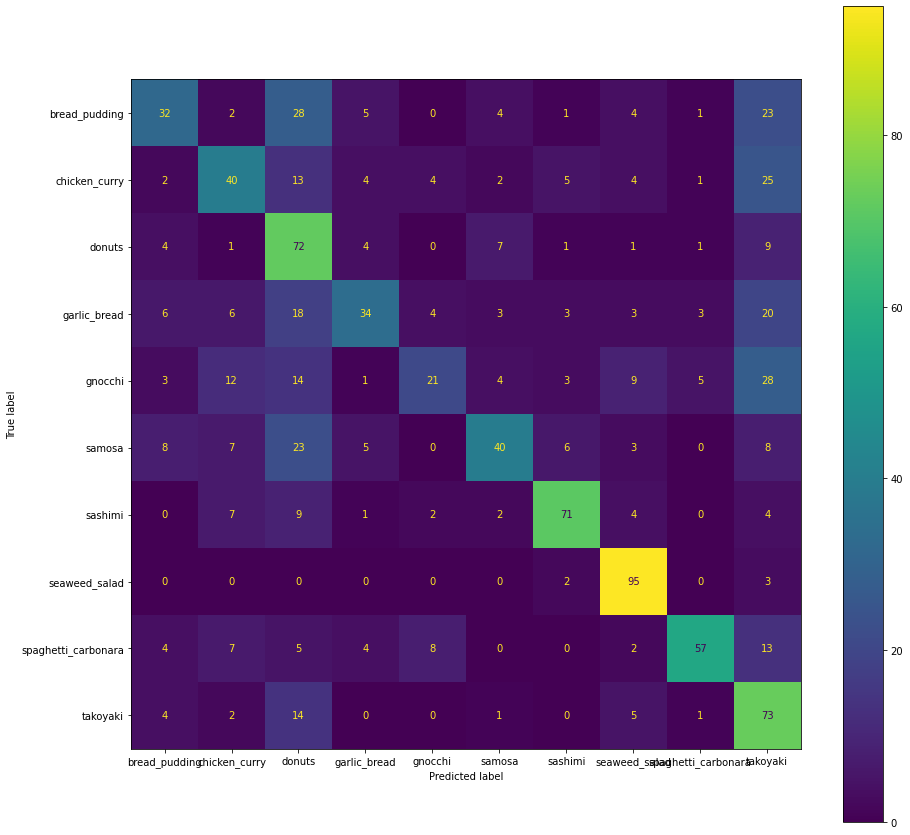

In [ ]:
plt.figure(figsize=(15,15))
ax = plt.subplot(1,1,1)
coba_cm = confusion_matrix(coba_y_true, coba_y_pred)
disp = ConfusionMatrixDisplay(coba_cm, display_labels=class_names)
disp.plot(ax=ax)
plt.show()

In [ ]:
print(classification_report(coba_y_true, coba_y_pred))

                     precision    recall  f1-score   support

      bread_pudding       0.51      0.32      0.39       100
      chicken_curry       0.48      0.40      0.43       100
             donuts       0.37      0.72      0.49       100
       garlic_bread       0.59      0.34      0.43       100
            gnocchi       0.54      0.21      0.30       100
             samosa       0.63      0.40      0.49       100
            sashimi       0.77      0.71      0.74       100
      seaweed_salad       0.73      0.95      0.83       100
spaghetti_carbonara       0.83      0.57      0.67       100
           takoyaki       0.35      0.73      0.48       100

           accuracy                           0.54      1000
          macro avg       0.58      0.53      0.53      1000
       weighted avg       0.58      0.54      0.53      1000



# Create ResNet50 Model

In [ ]:
def res_identity(x, filters): 
  #renet block where dimension doesnot change.
  #The skip connection is just simple identity conncection
  #we will have 3 blocks and then input will be added

  x_skip = x # this will be used for addition with the residual block 
  f1, f2 = filters

  #first block 
  x = tf.keras.layers.Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation(tf.keras.activations.relu)(x)

  #second block # bottleneck (but size kept same with padding)
  x = tf.keras.layers.Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation(tf.keras.activations.relu)(x)

  # third block activation used after adding the input
  x = tf.keras.layers.Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  x = tf.keras.layers.BatchNormalization()(x)
  # x = Activation(activations.relu)(x)

  # add the input 
  x = tf.keras.layers.Add()([x, x_skip])
  x = tf.keras.layers.Activation(tf.keras.activations.relu)(x)

  return x

In [ ]:
def res_conv(x, s, filters):
  '''
  here the input size changes''' 
  x_skip = x
  f1, f2 = filters

  # first block
  x = tf.keras.layers.Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  # when s = 2 then it is like downsizing the feature map
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation(tf.keras.activations.relu)(x)

  # second block
  x = tf.keras.layers.Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation(tf.keras.activations.relu)(x)

  #third block
  x = tf.keras.layers.Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
  x = tf.keras.layers.BatchNormalization()(x)

  # shortcut 
  x_skip = tf.keras.layers.Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_skip)
  x_skip = tf.keras.layers.BatchNormalization()(x_skip)

  # add 
  x = tf.keras.layers.Add()([x, x_skip])
  x = tf.keras.layers.Activation(tf.keras.activations.relu)(x)

  return x

In [ ]:
def resnet50():

  input_im = tf.keras.layers.Input(shape=(img_width, img_height, 3))

  x = data_augmentation(input_im)
  x = tf.keras.layers.Rescaling(1./255)(x)

  x = tf.keras.layers.ZeroPadding2D(padding=(3, 3))(x)

  # 1st stage
  # here we perform maxpooling, see the figure above

  x = tf.keras.layers.Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation(tf.keras.activations.relu)(x)
  x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage 
  # frm here on only conv block and identity block, no pooling

  x = res_conv(x, s=1, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))

  # 3rd stage

  x = res_conv(x, s=2, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))

  # 4th stage

  x = res_conv(x, s=2, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))

  # 5th stage

  x = res_conv(x, s=2, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))

  # ends with average pooling and dense connection

  x = tf.keras.layers.AveragePooling2D((2, 2), padding='same')(x)

  x = tf.keras.layers.Dropout(0.2)(x)

  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(len(class_names), activation='softmax', kernel_initializer='he_normal')(x) #multi-class

  # define the model 

  model = tf.keras.models.Model(inputs=input_im, outputs=x, name='Resnet50')

  return model

In [ ]:
resnet = resnet50()

## Compile Model

In [ ]:
resnet.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Model Summary

In [ ]:
resnet.summary()

Model: "Resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 128, 128, 3)  0           ['input_4[0][0]']                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 128, 128, 3)  0           ['sequential[4][0]']             
                                                                                                  
 zero_padding2d_3 (ZeroPadding2  (None, 134, 134, 3)  0          ['rescaling_4[0][0]']     

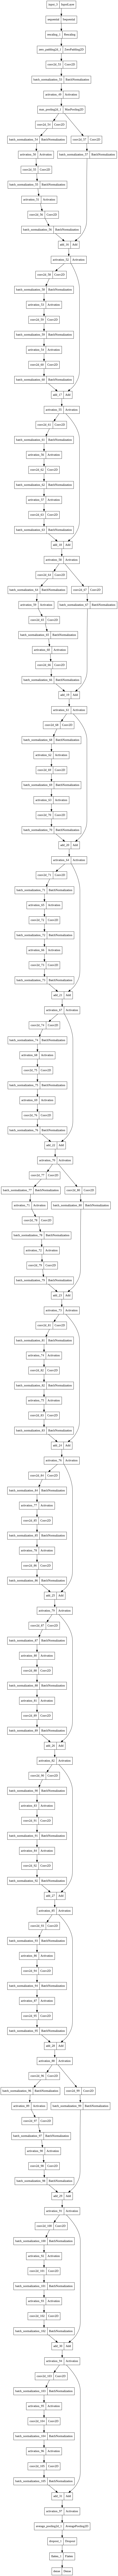

In [ ]:
plot_model(resnet)

## Train model

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('/content/drive/Shareddrives/Meng-emel/best_resnetModel.h5', monitor='val_loss', mode='min')
ResNetModel = resnet.fit(train_ds, validation_data=val_ds, epochs=100, verbose=1, callbacks=[mc,es])

Epoch 1/100
250/250 [==============================] - 45s 153ms/step - loss: 22.9905 - accuracy: 0.1434 - val_loss: 20.2816 - val_accuracy: 0.1500
Epoch 2/100
250/250 [==============================] - 36s 143ms/step - loss: 20.4130 - accuracy: 0.2454 - val_loss: 20.0293 - val_accuracy: 0.2950
Epoch 3/100
250/250 [==============================] - 36s 143ms/step - loss: 19.8609 - accuracy: 0.3096 - val_loss: 19.7142 - val_accuracy: 0.3580
Epoch 4/100
250/250 [==============================] - 36s 144ms/step - loss: 19.6174 - accuracy: 0.3298 - val_loss: 22.6307 - val_accuracy: 0.1960
Epoch 5/100
250/250 [==============================] - 36s 144ms/step - loss: 19.3489 - accuracy: 0.3519 - val_loss: 19.0435 - val_accuracy: 0.3910
Epoch 6/100
250/250 [==============================] - 36s 142ms/step - loss: 19.0653 - accuracy: 0.3744 - val_loss: 18.9021 - val_accuracy: 0.3830
Epoch 7/100
250/250 [==============================] - 36s 143ms/step - loss: 18.8358 - accuracy: 0.4015 - val_l

## Train Result

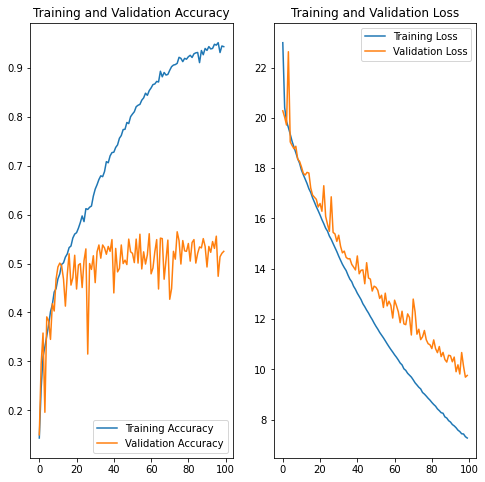

In [ ]:
acc = ResNetModel.history['accuracy']
val_acc = ResNetModel.history['val_accuracy']

loss = ResNetModel.history['loss']
val_loss = ResNetModel.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save ResNet50 Model

In [ ]:
resnet.save('/content/drive/Shareddrives/Meng-emel/saved_model/resnet_model.h5')

# Load ResNet50 Model

In [ ]:
resnet = tf.keras.models.load_model('/content/drive/Shareddrives/Meng-emel/saved_model/resnet_model.h5')

# Test ResNet50 Model

In [ ]:
test_path = '/content/drive/Shareddrives/Meng-emel/testing data/'
test_images = list(pathlib.Path(test_path).glob('*.jpg'))

resnet_y_pred = []
resnet_y_true = []

for i in range(len(test_images)):
  img = tf.keras.utils.load_img(
      str(test_images[i]), target_size=(img_height, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = resnet.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  filename = str(test_images[i])[51:]

  print(
      "The image '{}' most likely belongs to {} with a {:.2f} percent confidence."
      .format(filename, class_names[np.argmax(score)], 100 * np.max(score))
  )

  resnet_y_pred.append(class_names[np.argmax(score)])
  resnet_y_true.append(re.sub(r'_[0-9]+.jpg', '', filename))

The image 'chicken_curry_128873.jpg' most likely belongs to samosa with a 22.26 percent confidence.
The image 'chicken_curry_2031782.jpg' most likely belongs to garlic_bread with a 23.13 percent confidence.
The image 'chicken_curry_2679600.jpg' most likely belongs to chicken_curry with a 23.18 percent confidence.
The image 'chicken_curry_3572372.jpg' most likely belongs to takoyaki with a 16.54 percent confidence.
The image 'chicken_curry_415039.jpg' most likely belongs to chicken_curry with a 21.69 percent confidence.
The image 'chicken_curry_1857870.jpg' most likely belongs to chicken_curry with a 19.42 percent confidence.
The image 'chicken_curry_1615877.jpg' most likely belongs to takoyaki with a 23.15 percent confidence.
The image 'chicken_curry_2096438.jpg' most likely belongs to chicken_curry with a 23.20 percent confidence.
The image 'chicken_curry_656500.jpg' most likely belongs to chicken_curry with a 19.71 percent confidence.
The image 'chicken_curry_1621613.jpg' most likely

## Confidence

|File Name|Predicted Class|Actual Class|Confidence| 
|:-----:|:-----------:|:-----------:|:----------:|
| 'chicken_curry_128873.jpg' | samosa | chicken_curry | 22.26 |
| 'chicken_curry_2031782.jpg' | garlic_bread | chicken_curry | 23.13 |
| 'chicken_curry_2679600.jpg' | chicken_curry | chicken_curry | 23.18 |
| 'chicken_curry_3572372.jpg' | takoyaki | chicken_curry | 16.54 |
| 'chicken_curry_415039.jpg' | chicken_curry | chicken_curry | 21.69 |
| 'chicken_curry_1857870.jpg' | chicken_curry | chicken_curry | 19.42 |
| 'chicken_curry_1615877.jpg' | takoyaki | chicken_curry | 23.15 |
| 'chicken_curry_2096438.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_656500.jpg' | chicken_curry | chicken_curry | 19.71 |
| 'chicken_curry_1621613.jpg' | chicken_curry | chicken_curry | 23.13 |
| 'chicken_curry_2049685.jpg' | chicken_curry | chicken_curry | 23.15 |
| 'chicken_curry_3064522.jpg' | chicken_curry | chicken_curry | 23.18 |
| 'chicken_curry_2956788.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_1623603.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_2408036.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_2283627.jpg' | donuts | chicken_curry | 18.21 |
| 'chicken_curry_1179201.jpg' | chicken_curry | chicken_curry | 15.37 |
| 'chicken_curry_1234505.jpg' | takoyaki | chicken_curry | 17.23 |
| 'chicken_curry_1147844.jpg' | chicken_curry | chicken_curry | 23.02 |
| 'chicken_curry_636631.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_627128.jpg' | gnocchi | chicken_curry | 13.69 |
| 'chicken_curry_1757433.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_99631.jpg' | bread_pudding | chicken_curry | 13.13 |
| 'chicken_curry_202169.jpg' | chicken_curry | chicken_curry | 23.05 |
| 'chicken_curry_3066535.jpg' | spaghetti_carbonara | chicken_curry | 21.41 |
| 'chicken_curry_181852.jpg' | chicken_curry | chicken_curry | 22.51 |
| 'chicken_curry_1237705.jpg' | chicken_curry | chicken_curry | 21.87 |
| 'chicken_curry_1750242.jpg' | chicken_curry | chicken_curry | 23.19 |
| 'chicken_curry_1303435.jpg' | donuts | chicken_curry | 20.02 |
| 'chicken_curry_2129466.jpg' | chicken_curry | chicken_curry | 23.05 |
| 'chicken_curry_3050643.jpg' | sashimi | chicken_curry | 18.65 |
| 'chicken_curry_2681181.jpg' | chicken_curry | chicken_curry | 23.18 |
| 'chicken_curry_68606.jpg' | donuts | chicken_curry | 20.44 |
| 'chicken_curry_3506313.jpg' | donuts | chicken_curry | 22.59 |
| 'chicken_curry_2144449.jpg' | chicken_curry | chicken_curry | 14.69 |
| 'chicken_curry_1441189.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_108559.jpg' | chicken_curry | chicken_curry | 22.79 |
| 'chicken_curry_3578703.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_3539345.jpg' | chicken_curry | chicken_curry | 23.13 |
| 'chicken_curry_3307194.jpg' | donuts | chicken_curry | 23.03 |
| 'chicken_curry_1588422.jpg' | chicken_curry | chicken_curry | 21.02 |
| 'chicken_curry_2350467.jpg' | spaghetti_carbonara | chicken_curry | 16.64 |
| 'chicken_curry_2011230.jpg' | seaweed_salad | chicken_curry | 16.21 |
| 'chicken_curry_2322720.jpg' | gnocchi | chicken_curry | 15.68 |
| 'chicken_curry_95561.jpg' | gnocchi | chicken_curry | 22.95 |
| 'chicken_curry_1004867.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_148528.jpg' | spaghetti_carbonara | chicken_curry | 14.93 |
| 'chicken_curry_3202622.jpg' | takoyaki | chicken_curry | 18.58 |
| 'chicken_curry_1165404.jpg' | chicken_curry | chicken_curry | 23.19 |
| 'chicken_curry_2755111.jpg' | takoyaki | chicken_curry | 23.14 |
| 'chicken_curry_3047106.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_2181212.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_404095.jpg' | bread_pudding | chicken_curry | 23.10 |
| 'chicken_curry_762359.jpg' | chicken_curry | chicken_curry | 23.18 |
| 'chicken_curry_3201006.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_458109.jpg' | chicken_curry | chicken_curry | 23.19 |
| 'chicken_curry_3381419.jpg' | chicken_curry | chicken_curry | 23.01 |
| 'chicken_curry_606311.jpg' | donuts | chicken_curry | 23.07 |
| 'chicken_curry_3421060.jpg' | chicken_curry | chicken_curry | 23.19 |
| 'chicken_curry_2775937.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_2930745.jpg' | spaghetti_carbonara | chicken_curry | 22.44 |
| 'chicken_curry_1213873.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_1747438.jpg' | takoyaki | chicken_curry | 23.16 |
| 'chicken_curry_2154940.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_659615.jpg' | donuts | chicken_curry | 20.31 |
| 'chicken_curry_3286533.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_2973786.jpg' | chicken_curry | chicken_curry | 23.18 |
| 'chicken_curry_3647599.jpg' | samosa | chicken_curry | 22.76 |
| 'chicken_curry_991222.jpg' | chicken_curry | chicken_curry | 22.69 |
| 'chicken_curry_2538260.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_1285185.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_1651201.jpg' | chicken_curry | chicken_curry | 17.80 |
| 'chicken_curry_1866247.jpg' | takoyaki | chicken_curry | 23.16 |
| 'chicken_curry_2763485.jpg' | chicken_curry | chicken_curry | 14.70 |
| 'chicken_curry_16107.jpg' | chicken_curry | chicken_curry | 15.77 |
| 'chicken_curry_2669371.jpg' | takoyaki | chicken_curry | 15.03 |
| 'chicken_curry_3516788.jpg' | gnocchi | chicken_curry | 20.94 |
| 'chicken_curry_3406137.jpg' | takoyaki | chicken_curry | 13.36 |
| 'chicken_curry_3643525.jpg' | donuts | chicken_curry | 22.22 |
| 'chicken_curry_608834.jpg' | takoyaki | chicken_curry | 23.09 |
| 'chicken_curry_1116408.jpg' | donuts | chicken_curry | 19.15 |
| 'chicken_curry_2683308.jpg' | chicken_curry | chicken_curry | 22.91 |
| 'chicken_curry_1071242.jpg' | bread_pudding | chicken_curry | 22.43 |
| 'chicken_curry_742147.jpg' | chicken_curry | chicken_curry | 22.61 |
| 'chicken_curry_1173563.jpg' | chicken_curry | chicken_curry | 23.08 |
| 'chicken_curry_3587389.jpg' | chicken_curry | chicken_curry | 22.57 |
| 'chicken_curry_3233857.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_2461932.jpg' | donuts | chicken_curry | 23.03 |
| 'chicken_curry_1855072.jpg' | garlic_bread | chicken_curry | 21.45 |
| 'chicken_curry_254063.jpg' | chicken_curry | chicken_curry | 22.89 |
| 'chicken_curry_1750654.jpg' | chicken_curry | chicken_curry | 19.89 |
| 'chicken_curry_374064.jpg' | chicken_curry | chicken_curry | 23.18 |
| 'chicken_curry_3628366.jpg' | chicken_curry | chicken_curry | 23.15 |
| 'chicken_curry_2508483.jpg' | chicken_curry | chicken_curry | 22.02 |
| 'chicken_curry_1686313.jpg' | garlic_bread | chicken_curry | 18.21 |
| 'chicken_curry_743077.jpg' | spaghetti_carbonara | chicken_curry | 15.95 |
| 'chicken_curry_1820366.jpg' | chicken_curry | chicken_curry | 23.18 |
| 'chicken_curry_181401.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'chicken_curry_2628746.jpg' | chicken_curry | chicken_curry | 22.77 |
| 'gnocchi_166829.jpg' | donuts | gnocchi | 18.61 |
| 'gnocchi_1105458.jpg' | takoyaki | gnocchi | 23.18 |
| 'gnocchi_3479466.jpg' | spaghetti_carbonara | gnocchi | 22.90 |
| 'gnocchi_1396282.jpg' | spaghetti_carbonara | gnocchi | 22.42 |
| 'gnocchi_1644320.jpg' | chicken_curry | gnocchi | 21.10 |
| 'gnocchi_3456693.jpg' | donuts | gnocchi | 22.92 |
| 'gnocchi_2365406.jpg' | gnocchi | gnocchi | 17.80 |
| 'gnocchi_2319340.jpg' | bread_pudding | gnocchi | 23.10 |
| 'gnocchi_3410913.jpg' | gnocchi | gnocchi | 18.91 |
| 'gnocchi_3260727.jpg' | samosa | gnocchi | 17.24 |
| 'gnocchi_2436595.jpg' | spaghetti_carbonara | gnocchi | 23.14 |
| 'gnocchi_356379.jpg' | gnocchi | gnocchi | 22.90 |
| 'gnocchi_663698.jpg' | spaghetti_carbonara | gnocchi | 21.27 |
| 'gnocchi_365012.jpg' | gnocchi | gnocchi | 15.02 |
| 'gnocchi_2678499.jpg' | chicken_curry | gnocchi | 21.69 |
| 'gnocchi_1503501.jpg' | gnocchi | gnocchi | 22.90 |
| 'gnocchi_3723181.jpg' | takoyaki | gnocchi | 23.16 |
| 'gnocchi_1087611.jpg' | chicken_curry | gnocchi | 22.04 |
| 'gnocchi_3604303.jpg' | seaweed_salad | gnocchi | 22.55 |
| 'gnocchi_1668031.jpg' | chicken_curry | gnocchi | 23.19 |
| 'gnocchi_1077200.jpg' | chicken_curry | gnocchi | 21.93 |
| 'gnocchi_2427397.jpg' | chicken_curry | gnocchi | 23.10 |
| 'gnocchi_1622193.jpg' | gnocchi | gnocchi | 18.38 |
| 'gnocchi_1600636.jpg' | garlic_bread | gnocchi | 20.35 |
| 'gnocchi_1956781.jpg' | chicken_curry | gnocchi | 23.18 |
| 'gnocchi_1190698.jpg' | takoyaki | gnocchi | 21.09 |
| 'gnocchi_689668.jpg' | chicken_curry | gnocchi | 17.39 |
| 'gnocchi_3401312.jpg' | garlic_bread | gnocchi | 21.58 |
| 'gnocchi_2541492.jpg' | gnocchi | gnocchi | 16.53 |
| 'gnocchi_2278510.jpg' | donuts | gnocchi | 20.65 |
| 'gnocchi_135126.jpg' | takoyaki | gnocchi | 23.18 |
| 'gnocchi_3821730.jpg' | samosa | gnocchi | 17.23 |
| 'gnocchi_3172633.jpg' | spaghetti_carbonara | gnocchi | 22.47 |
| 'gnocchi_200158.jpg' | spaghetti_carbonara | gnocchi | 16.93 |
| 'gnocchi_598428.jpg' | gnocchi | gnocchi | 17.72 |
| 'gnocchi_2614187.jpg' | bread_pudding | gnocchi | 21.83 |
| 'gnocchi_3313967.jpg' | spaghetti_carbonara | gnocchi | 21.57 |
| 'gnocchi_2026973.jpg' | takoyaki | gnocchi | 22.12 |
| 'gnocchi_3577439.jpg' | takoyaki | gnocchi | 13.48 |
| 'gnocchi_2407006.jpg' | donuts | gnocchi | 14.51 |
| 'gnocchi_2320081.jpg' | takoyaki | gnocchi | 22.35 |
| 'gnocchi_2077350.jpg' | gnocchi | gnocchi | 18.48 |
| 'gnocchi_571601.jpg' | chicken_curry | gnocchi | 19.29 |
| 'gnocchi_3864895.jpg' | chicken_curry | gnocchi | 22.47 |
| 'gnocchi_2397771.jpg' | chicken_curry | gnocchi | 23.18 |
| 'gnocchi_397361.jpg' | takoyaki | gnocchi | 16.38 |
| 'gnocchi_1887759.jpg' | gnocchi | gnocchi | 22.65 |
| 'gnocchi_543410.jpg' | gnocchi | gnocchi | 16.87 |
| 'gnocchi_3523747.jpg' | chicken_curry | gnocchi | 15.87 |
| 'gnocchi_1807026.jpg' | chicken_curry | gnocchi | 20.90 |
| 'gnocchi_1985249.jpg' | gnocchi | gnocchi | 23.01 |
| 'gnocchi_361486.jpg' | donuts | gnocchi | 13.59 |
| 'gnocchi_66578.jpg' | gnocchi | gnocchi | 22.86 |
| 'gnocchi_875603.jpg' | takoyaki | gnocchi | 20.80 |
| 'gnocchi_1116038.jpg' | bread_pudding | gnocchi | 20.04 |
| 'gnocchi_1880761.jpg' | gnocchi | gnocchi | 23.11 |
| 'gnocchi_1376880.jpg' | chicken_curry | gnocchi | 18.19 |
| 'gnocchi_1390930.jpg' | takoyaki | gnocchi | 17.81 |
| 'gnocchi_1423008.jpg' | seaweed_salad | gnocchi | 22.51 |
| 'gnocchi_374405.jpg' | spaghetti_carbonara | gnocchi | 17.81 |
| 'gnocchi_1342195.jpg' | chicken_curry | gnocchi | 17.05 |
| 'gnocchi_3467162.jpg' | takoyaki | gnocchi | 22.29 |
| 'gnocchi_867774.jpg' | garlic_bread | gnocchi | 16.49 |
| 'gnocchi_1840771.jpg' | donuts | gnocchi | 21.11 |
| 'gnocchi_3811337.jpg' | spaghetti_carbonara | gnocchi | 20.12 |
| 'gnocchi_21471.jpg' | spaghetti_carbonara | gnocchi | 18.12 |
| 'gnocchi_638889.jpg' | seaweed_salad | gnocchi | 23.20 |
| 'gnocchi_552188.jpg' | donuts | gnocchi | 19.13 |
| 'gnocchi_3042007.jpg' | takoyaki | gnocchi | 12.78 |
| 'gnocchi_540620.jpg' | bread_pudding | gnocchi | 15.32 |
| 'gnocchi_2081726.jpg' | gnocchi | gnocchi | 20.29 |
| 'gnocchi_1534334.jpg' | gnocchi | gnocchi | 17.88 |
| 'gnocchi_1566665.jpg' | gnocchi | gnocchi | 22.55 |
| 'gnocchi_3156505.jpg' | takoyaki | gnocchi | 21.42 |
| 'gnocchi_335389.jpg' | spaghetti_carbonara | gnocchi | 19.17 |
| 'gnocchi_861949.jpg' | bread_pudding | gnocchi | 12.68 |
| 'gnocchi_1319327.jpg' | gnocchi | gnocchi | 23.15 |
| 'gnocchi_2188694.jpg' | sashimi | gnocchi | 21.61 |
| 'gnocchi_2732704.jpg' | takoyaki | gnocchi | 18.12 |
| 'gnocchi_2691024.jpg' | takoyaki | gnocchi | 21.75 |
| 'gnocchi_2136654.jpg' | spaghetti_carbonara | gnocchi | 21.50 |
| 'gnocchi_810103.jpg' | takoyaki | gnocchi | 20.99 |
| 'gnocchi_1716761.jpg' | spaghetti_carbonara | gnocchi | 21.83 |
| 'gnocchi_3791682.jpg' | gnocchi | gnocchi | 23.20 |
| 'gnocchi_2583516.jpg' | gnocchi | gnocchi | 15.22 |
| 'gnocchi_1938314.jpg' | gnocchi | gnocchi | 23.12 |
| 'gnocchi_160935.jpg' | chicken_curry | gnocchi | 22.31 |
| 'gnocchi_2523466.jpg' | takoyaki | gnocchi | 23.17 |
| 'gnocchi_3396597.jpg' | chicken_curry | gnocchi | 16.64 |
| 'gnocchi_3435306.jpg' | gnocchi | gnocchi | 19.28 |
| 'gnocchi_3111391.jpg' | gnocchi | gnocchi | 23.16 |
| 'gnocchi_1044683.jpg' | seaweed_salad | gnocchi | 16.97 |
| 'gnocchi_3287053.jpg' | gnocchi | gnocchi | 21.18 |
| 'gnocchi_1305083.jpg' | samosa | gnocchi | 18.18 |
| 'gnocchi_667267.jpg' | gnocchi | gnocchi | 17.27 |
| 'gnocchi_482737.jpg' | samosa | gnocchi | 23.20 |
| 'gnocchi_2321420.jpg' | chicken_curry | gnocchi | 21.95 |
| 'gnocchi_1150526.jpg' | spaghetti_carbonara | gnocchi | 23.05 |
| 'gnocchi_3384948.jpg' | gnocchi | gnocchi | 15.99 |
| 'gnocchi_1214945.jpg' | seaweed_salad | gnocchi | 23.18 |
| 'samosa_2610926.jpg' | takoyaki | samosa | 16.20 |
| 'samosa_2591759.jpg' | chicken_curry | samosa | 22.63 |
| 'samosa_3852343.jpg' | samosa | samosa | 22.18 |
| 'samosa_3478622.jpg' | chicken_curry | samosa | 23.19 |
| 'samosa_3470860.jpg' | samosa | samosa | 23.16 |
| 'samosa_3158737.jpg' | donuts | samosa | 15.68 |
| 'samosa_2749468.jpg' | chicken_curry | samosa | 19.01 |
| 'samosa_2640673.jpg' | samosa | samosa | 22.97 |
| 'samosa_3896636.jpg' | bread_pudding | samosa | 14.34 |
| 'samosa_3312541.jpg' | bread_pudding | samosa | 15.92 |
| 'samosa_476861.jpg' | gnocchi | samosa | 17.27 |
| 'samosa_3816877.jpg' | seaweed_salad | samosa | 22.51 |
| 'samosa_2582408.jpg' | spaghetti_carbonara | samosa | 16.31 |
| 'samosa_848555.jpg' | donuts | samosa | 23.19 |
| 'samosa_3114069.jpg' | takoyaki | samosa | 23.20 |
| 'samosa_3588854.jpg' | chicken_curry | samosa | 15.59 |
| 'samosa_1719005.jpg' | donuts | samosa | 15.37 |
| 'samosa_51286.jpg' | donuts | samosa | 16.77 |
| 'samosa_3889022.jpg' | samosa | samosa | 21.07 |
| 'samosa_502378.jpg' | samosa | samosa | 17.10 |
| 'samosa_2124470.jpg' | bread_pudding | samosa | 13.64 |
| 'samosa_1102964.jpg' | samosa | samosa | 23.20 |
| 'samosa_2832626.jpg' | gnocchi | samosa | 15.56 |
| 'samosa_3527351.jpg' | donuts | samosa | 15.70 |
| 'samosa_3642609.jpg' | bread_pudding | samosa | 19.68 |
| 'samosa_540998.jpg' | samosa | samosa | 15.40 |
| 'samosa_917040.jpg' | bread_pudding | samosa | 17.04 |
| 'samosa_1683284.jpg' | samosa | samosa | 22.53 |
| 'samosa_1715481.jpg' | chicken_curry | samosa | 23.15 |
| 'samosa_528024.jpg' | takoyaki | samosa | 22.97 |
| 'samosa_2082040.jpg' | sashimi | samosa | 17.92 |
| 'samosa_730084.jpg' | samosa | samosa | 23.20 |
| 'samosa_1487314.jpg' | garlic_bread | samosa | 20.68 |
| 'samosa_935849.jpg' | samosa | samosa | 13.98 |
| 'samosa_512319.jpg' | samosa | samosa | 23.15 |
| 'samosa_3201718.jpg' | samosa | samosa | 23.09 |
| 'samosa_2043815.jpg' | chicken_curry | samosa | 22.12 |
| 'samosa_2969195.jpg' | donuts | samosa | 21.60 |
| 'samosa_2773043.jpg' | chicken_curry | samosa | 23.20 |
| 'samosa_3726288.jpg' | garlic_bread | samosa | 18.64 |
| 'samosa_3380807.jpg' | donuts | samosa | 23.00 |
| 'samosa_2137689.jpg' | samosa | samosa | 18.33 |
| 'samosa_1351506.jpg' | chicken_curry | samosa | 22.97 |
| 'samosa_2935194.jpg' | samosa | samosa | 18.68 |
| 'samosa_3024608.jpg' | chicken_curry | samosa | 21.97 |
| 'samosa_2952361.jpg' | samosa | samosa | 22.91 |
| 'samosa_2617136.jpg' | samosa | samosa | 21.98 |
| 'samosa_1921619.jpg' | chicken_curry | samosa | 23.02 |
| 'samosa_101365.jpg' | chicken_curry | samosa | 17.62 |
| 'samosa_153570.jpg' | samosa | samosa | 21.83 |
| 'samosa_2056655.jpg' | chicken_curry | samosa | 21.39 |
| 'samosa_2299925.jpg' | bread_pudding | samosa | 13.97 |
| 'samosa_3913567.jpg' | samosa | samosa | 19.68 |
| 'samosa_3445882.jpg' | samosa | samosa | 23.14 |
| 'samosa_1288461.jpg' | takoyaki | samosa | 16.03 |
| 'samosa_2074215.jpg' | donuts | samosa | 21.21 |
| 'samosa_543209.jpg' | bread_pudding | samosa | 21.60 |
| 'samosa_1481688.jpg' | takoyaki | samosa | 14.48 |
| 'samosa_989842.jpg' | donuts | samosa | 18.29 |
| 'samosa_1961805.jpg' | samosa | samosa | 15.64 |
| 'samosa_575740.jpg' | donuts | samosa | 19.89 |
| 'samosa_3658115.jpg' | chicken_curry | samosa | 23.13 |
| 'samosa_904242.jpg' | samosa | samosa | 23.20 |
| 'samosa_3778934.jpg' | takoyaki | samosa | 15.87 |
| 'samosa_3834030.jpg' | samosa | samosa | 23.16 |
| 'samosa_2427760.jpg' | donuts | samosa | 14.97 |
| 'samosa_2401578.jpg' | samosa | samosa | 14.44 |
| 'samosa_3731931.jpg' | bread_pudding | samosa | 18.36 |
| 'samosa_2950063.jpg' | samosa | samosa | 23.20 |
| 'samosa_954396.jpg' | chicken_curry | samosa | 13.48 |
| 'samosa_725559.jpg' | bread_pudding | samosa | 22.21 |
| 'samosa_858583.jpg' | chicken_curry | samosa | 14.96 |
| 'samosa_2483017.jpg' | chicken_curry | samosa | 15.84 |
| 'samosa_1478597.jpg' | donuts | samosa | 22.38 |
| 'samosa_1319536.jpg' | bread_pudding | samosa | 16.47 |
| 'samosa_1156227.jpg' | chicken_curry | samosa | 18.04 |
| 'samosa_2394310.jpg' | chicken_curry | samosa | 23.02 |
| 'samosa_1886344.jpg' | samosa | samosa | 22.13 |
| 'samosa_3911453.jpg' | donuts | samosa | 21.81 |
| 'samosa_2383902.jpg' | samosa | samosa | 20.08 |
| 'samosa_1448605.jpg' | samosa | samosa | 22.30 |
| 'samosa_980684.jpg' | samosa | samosa | 19.49 |
| 'samosa_3161833.jpg' | samosa | samosa | 22.99 |
| 'samosa_1145672.jpg' | gnocchi | samosa | 20.26 |
| 'samosa_3848239.jpg' | samosa | samosa | 22.60 |
| 'samosa_1449447.jpg' | chicken_curry | samosa | 22.05 |
| 'samosa_3521485.jpg' | bread_pudding | samosa | 19.54 |
| 'samosa_1526228.jpg' | samosa | samosa | 22.32 |
| 'samosa_646334.jpg' | samosa | samosa | 19.90 |
| 'samosa_1881590.jpg' | samosa | samosa | 23.17 |
| 'samosa_2609323.jpg' | bread_pudding | samosa | 15.02 |
| 'samosa_569843.jpg' | donuts | samosa | 20.88 |
| 'samosa_3121154.jpg' | samosa | samosa | 20.57 |
| 'samosa_3017105.jpg' | samosa | samosa | 19.62 |
| 'samosa_2179388.jpg' | donuts | samosa | 22.84 |
| 'samosa_812692.jpg' | takoyaki | samosa | 23.15 |
| 'samosa_459316.jpg' | samosa | samosa | 23.20 |
| 'samosa_1763695.jpg' | samosa | samosa | 23.18 |
| 'samosa_925427.jpg' | samosa | samosa | 17.29 |
| 'samosa_3814941.jpg' | bread_pudding | samosa | 21.90 |
| 'spaghetti_carbonara_3640949.jpg' | garlic_bread | spaghetti_carbonara | 21.28 |
| 'spaghetti_carbonara_1417230.jpg' | takoyaki | spaghetti_carbonara | 18.19 |
| 'spaghetti_carbonara_1449855.jpg' | chicken_curry | spaghetti_carbonara | 18.57 |
| 'spaghetti_carbonara_207263.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.20 |
| 'spaghetti_carbonara_268113.jpg' | spaghetti_carbonara | spaghetti_carbonara | 15.87 |
| 'spaghetti_carbonara_3447824.jpg' | spaghetti_carbonara | spaghetti_carbonara | 18.75 |
| 'spaghetti_carbonara_166320.jpg' | chicken_curry | spaghetti_carbonara | 19.84 |
| 'spaghetti_carbonara_1223435.jpg' | chicken_curry | spaghetti_carbonara | 18.99 |
| 'spaghetti_carbonara_1354606.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.20 |
| 'spaghetti_carbonara_1249087.jpg' | spaghetti_carbonara | spaghetti_carbonara | 21.29 |
| 'spaghetti_carbonara_2538216.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.10 |
| 'spaghetti_carbonara_3006491.jpg' | spaghetti_carbonara | spaghetti_carbonara | 20.74 |
| 'spaghetti_carbonara_1853721.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.19 |
| 'spaghetti_carbonara_1552336.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.19 |
| 'spaghetti_carbonara_2756117.jpg' | takoyaki | spaghetti_carbonara | 22.89 |
| 'spaghetti_carbonara_933389.jpg' | spaghetti_carbonara | spaghetti_carbonara | 15.33 |
| 'spaghetti_carbonara_670426.jpg' | spaghetti_carbonara | spaghetti_carbonara | 22.42 |
| 'spaghetti_carbonara_638821.jpg' | spaghetti_carbonara | spaghetti_carbonara | 15.36 |
| 'spaghetti_carbonara_868424.jpg' | garlic_bread | spaghetti_carbonara | 15.03 |
| 'spaghetti_carbonara_2044550.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.20 |
| 'spaghetti_carbonara_221557.jpg' | spaghetti_carbonara | spaghetti_carbonara | 18.17 |
| 'spaghetti_carbonara_1180742.jpg' | spaghetti_carbonara | spaghetti_carbonara | 15.25 |
| 'spaghetti_carbonara_2439202.jpg' | gnocchi | spaghetti_carbonara | 19.95 |
| 'spaghetti_carbonara_1135824.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.15 |
| 'spaghetti_carbonara_1212256.jpg' | takoyaki | spaghetti_carbonara | 12.23 |
| 'spaghetti_carbonara_49667.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.20 |
| 'spaghetti_carbonara_1837716.jpg' | chicken_curry | spaghetti_carbonara | 22.00 |
| 'spaghetti_carbonara_1505372.jpg' | donuts | spaghetti_carbonara | 22.90 |
| 'spaghetti_carbonara_1509906.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.19 |
| 'spaghetti_carbonara_3003788.jpg' | spaghetti_carbonara | spaghetti_carbonara | 22.34 |
| 'spaghetti_carbonara_1744036.jpg' | spaghetti_carbonara | spaghetti_carbonara | 22.91 |
| 'spaghetti_carbonara_2478314.jpg' | spaghetti_carbonara | spaghetti_carbonara | 22.97 |
| 'spaghetti_carbonara_2272197.jpg' | spaghetti_carbonara | spaghetti_carbonara | 20.48 |
| 'spaghetti_carbonara_2660397.jpg' | spaghetti_carbonara | spaghetti_carbonara | 19.46 |
| 'spaghetti_carbonara_2440060.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.19 |
| 'spaghetti_carbonara_845329.jpg' | bread_pudding | spaghetti_carbonara | 16.84 |
| 'spaghetti_carbonara_458892.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.20 |
| 'spaghetti_carbonara_1608716.jpg' | spaghetti_carbonara | spaghetti_carbonara | 16.41 |
| 'spaghetti_carbonara_1145270.jpg' | spaghetti_carbonara | spaghetti_carbonara | 22.80 |
| 'spaghetti_carbonara_3384136.jpg' | chicken_curry | spaghetti_carbonara | 14.51 |
| 'spaghetti_carbonara_2192677.jpg' | spaghetti_carbonara | spaghetti_carbonara | 22.94 |
| 'spaghetti_carbonara_1536298.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.12 |
| 'spaghetti_carbonara_1554194.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.14 |
| 'spaghetti_carbonara_2214290.jpg' | spaghetti_carbonara | spaghetti_carbonara | 21.35 |
| 'spaghetti_carbonara_379344.jpg' | garlic_bread | spaghetti_carbonara | 22.75 |
| 'spaghetti_carbonara_778614.jpg' | takoyaki | spaghetti_carbonara | 12.91 |
| 'spaghetti_carbonara_3567872.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.17 |
| 'spaghetti_carbonara_1379644.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.17 |
| 'spaghetti_carbonara_3874277.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.16 |
| 'spaghetti_carbonara_650213.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.19 |
| 'spaghetti_carbonara_2175760.jpg' | spaghetti_carbonara | spaghetti_carbonara | 20.03 |
| 'spaghetti_carbonara_521943.jpg' | spaghetti_carbonara | spaghetti_carbonara | 21.56 |
| 'spaghetti_carbonara_1964785.jpg' | takoyaki | spaghetti_carbonara | 18.15 |
| 'spaghetti_carbonara_2416282.jpg' | spaghetti_carbonara | spaghetti_carbonara | 15.88 |
| 'spaghetti_carbonara_1328339.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.20 |
| 'spaghetti_carbonara_732412.jpg' | spaghetti_carbonara | spaghetti_carbonara | 22.93 |
| 'spaghetti_carbonara_710050.jpg' | seaweed_salad | spaghetti_carbonara | 21.29 |
| 'spaghetti_carbonara_1551970.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.19 |
| 'spaghetti_carbonara_1679241.jpg' | chicken_curry | spaghetti_carbonara | 22.13 |
| 'spaghetti_carbonara_2938942.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.16 |
| 'spaghetti_carbonara_2957999.jpg' | takoyaki | spaghetti_carbonara | 21.31 |
| 'spaghetti_carbonara_1644133.jpg' | spaghetti_carbonara | spaghetti_carbonara | 22.92 |
| 'spaghetti_carbonara_407820.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.14 |
| 'spaghetti_carbonara_2829716.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.19 |
| 'spaghetti_carbonara_3140195.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.20 |
| 'spaghetti_carbonara_538741.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.15 |
| 'spaghetti_carbonara_767748.jpg' | spaghetti_carbonara | spaghetti_carbonara | 22.92 |
| 'spaghetti_carbonara_232250.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.14 |
| 'spaghetti_carbonara_2085991.jpg' | spaghetti_carbonara | spaghetti_carbonara | 20.69 |
| 'spaghetti_carbonara_1731802.jpg' | samosa | spaghetti_carbonara | 13.87 |
| 'spaghetti_carbonara_3152549.jpg' | chicken_curry | spaghetti_carbonara | 20.30 |
| 'spaghetti_carbonara_1387488.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.19 |
| 'spaghetti_carbonara_626321.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.17 |
| 'spaghetti_carbonara_1134105.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.20 |
| 'spaghetti_carbonara_1522638.jpg' | gnocchi | spaghetti_carbonara | 20.80 |
| 'spaghetti_carbonara_1507890.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.20 |
| 'spaghetti_carbonara_3848327.jpg' | spaghetti_carbonara | spaghetti_carbonara | 17.54 |
| 'spaghetti_carbonara_376969.jpg' | spaghetti_carbonara | spaghetti_carbonara | 22.59 |
| 'spaghetti_carbonara_911604.jpg' | spaghetti_carbonara | spaghetti_carbonara | 20.17 |
| 'spaghetti_carbonara_1766044.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.20 |
| 'spaghetti_carbonara_2137681.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.15 |
| 'spaghetti_carbonara_534306.jpg' | spaghetti_carbonara | spaghetti_carbonara | 22.55 |
| 'spaghetti_carbonara_842057.jpg' | garlic_bread | spaghetti_carbonara | 17.48 |
| 'spaghetti_carbonara_1723399.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.19 |
| 'spaghetti_carbonara_1337632.jpg' | donuts | spaghetti_carbonara | 16.07 |
| 'spaghetti_carbonara_2449522.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.09 |
| 'spaghetti_carbonara_374869.jpg' | spaghetti_carbonara | spaghetti_carbonara | 18.41 |
| 'spaghetti_carbonara_755025.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.20 |
| 'spaghetti_carbonara_3697544.jpg' | gnocchi | spaghetti_carbonara | 20.18 |
| 'spaghetti_carbonara_2851292.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.04 |
| 'spaghetti_carbonara_1368404.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.19 |
| 'spaghetti_carbonara_1897503.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.11 |
| 'spaghetti_carbonara_2694430.jpg' | spaghetti_carbonara | spaghetti_carbonara | 22.44 |
| 'spaghetti_carbonara_2166126.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.19 |
| 'spaghetti_carbonara_1563009.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.13 |
| 'spaghetti_carbonara_2307126.jpg' | spaghetti_carbonara | spaghetti_carbonara | 21.15 |
| 'spaghetti_carbonara_767212.jpg' | gnocchi | spaghetti_carbonara | 21.97 |
| 'spaghetti_carbonara_2182164.jpg' | spaghetti_carbonara | spaghetti_carbonara | 23.20 |
| 'spaghetti_carbonara_2008462.jpg' | spaghetti_carbonara | spaghetti_carbonara | 22.90 |
| 'sashimi_2393618.jpg' | chicken_curry | sashimi | 16.30 |
| 'sashimi_3079668.jpg' | sashimi | sashimi | 23.19 |
| 'sashimi_3774880.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_736976.jpg' | sashimi | sashimi | 22.29 |
| 'sashimi_546338.jpg' | chicken_curry | sashimi | 23.07 |
| 'sashimi_1549215.jpg' | chicken_curry | sashimi | 21.43 |
| 'sashimi_1056853.jpg' | donuts | sashimi | 14.49 |
| 'sashimi_1184087.jpg' | sashimi | sashimi | 23.17 |
| 'sashimi_2727298.jpg' | sashimi | sashimi | 22.16 |
| 'sashimi_581698.jpg' | donuts | sashimi | 22.24 |
| 'sashimi_1758820.jpg' | donuts | sashimi | 22.47 |
| 'sashimi_3299653.jpg' | donuts | sashimi | 13.65 |
| 'sashimi_339613.jpg' | takoyaki | sashimi | 19.07 |
| 'sashimi_3475894.jpg' | chicken_curry | sashimi | 15.17 |
| 'sashimi_1362158.jpg' | sashimi | sashimi | 23.17 |
| 'sashimi_3191511.jpg' | donuts | sashimi | 21.11 |
| 'sashimi_1843435.jpg' | sashimi | sashimi | 23.19 |
| 'sashimi_2070293.jpg' | sashimi | sashimi | 22.07 |
| 'sashimi_3127743.jpg' | sashimi | sashimi | 22.55 |
| 'sashimi_2995174.jpg' | sashimi | sashimi | 16.08 |
| 'sashimi_1977089.jpg' | donuts | sashimi | 20.46 |
| 'sashimi_3125302.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_2600809.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_1043094.jpg' | chicken_curry | sashimi | 22.11 |
| 'sashimi_1689131.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_2724479.jpg' | sashimi | sashimi | 23.19 |
| 'sashimi_2812559.jpg' | sashimi | sashimi | 22.62 |
| 'sashimi_2182195.jpg' | donuts | sashimi | 21.80 |
| 'sashimi_2617442.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_267237.jpg' | seaweed_salad | sashimi | 23.17 |
| 'sashimi_1797545.jpg' | chicken_curry | sashimi | 23.20 |
| 'sashimi_2913357.jpg' | sashimi | sashimi | 23.19 |
| 'sashimi_1731805.jpg' | sashimi | sashimi | 23.19 |
| 'sashimi_3361149.jpg' | bread_pudding | sashimi | 18.59 |
| 'sashimi_23524.jpg' | chicken_curry | sashimi | 19.18 |
| 'sashimi_2031990.jpg' | sashimi | sashimi | 14.82 |
| 'sashimi_50156.jpg' | chicken_curry | sashimi | 16.66 |
| 'sashimi_2989649.jpg' | chicken_curry | sashimi | 16.81 |
| 'sashimi_2979097.jpg' | samosa | sashimi | 15.58 |
| 'sashimi_1183040.jpg' | samosa | sashimi | 19.09 |
| 'sashimi_156200.jpg' | sashimi | sashimi | 13.89 |
| 'sashimi_3151141.jpg' | chicken_curry | sashimi | 19.51 |
| 'sashimi_2735975.jpg' | sashimi | sashimi | 23.19 |
| 'sashimi_1536570.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_3904748.jpg' | takoyaki | sashimi | 23.10 |
| 'sashimi_313269.jpg' | sashimi | sashimi | 22.86 |
| 'sashimi_3484663.jpg' | sashimi | sashimi | 23.19 |
| 'sashimi_136070.jpg' | sashimi | sashimi | 23.16 |
| 'sashimi_3621134.jpg' | sashimi | sashimi | 23.19 |
| 'sashimi_3728978.jpg' | takoyaki | sashimi | 17.22 |
| 'sashimi_1251801.jpg' | chicken_curry | sashimi | 17.44 |
| 'sashimi_1780503.jpg' | sashimi | sashimi | 14.01 |
| 'sashimi_2171679.jpg' | sashimi | sashimi | 22.72 |
| 'sashimi_256086.jpg' | gnocchi | sashimi | 20.60 |
| 'sashimi_844328.jpg' | sashimi | sashimi | 22.37 |
| 'sashimi_3235203.jpg' | donuts | sashimi | 15.20 |
| 'sashimi_1378840.jpg' | donuts | sashimi | 18.60 |
| 'sashimi_1790599.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_2738151.jpg' | donuts | sashimi | 23.11 |
| 'sashimi_2702847.jpg' | donuts | sashimi | 22.42 |
| 'sashimi_1767419.jpg' | spaghetti_carbonara | sashimi | 17.33 |
| 'sashimi_2334273.jpg' | sashimi | sashimi | 21.52 |
| 'sashimi_3593122.jpg' | sashimi | sashimi | 23.03 |
| 'sashimi_3575511.jpg' | sashimi | sashimi | 22.90 |
| 'sashimi_128947.jpg' | sashimi | sashimi | 22.94 |
| 'sashimi_586438.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_174938.jpg' | takoyaki | sashimi | 17.77 |
| 'sashimi_288685.jpg' | sashimi | sashimi | 17.43 |
| 'sashimi_3812801.jpg' | chicken_curry | sashimi | 23.14 |
| 'sashimi_1504812.jpg' | gnocchi | sashimi | 23.15 |
| 'sashimi_2760825.jpg' | sashimi | sashimi | 18.77 |
| 'sashimi_1974790.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_1783303.jpg' | seaweed_salad | sashimi | 19.97 |
| 'sashimi_1282522.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_1650859.jpg' | gnocchi | sashimi | 18.74 |
| 'sashimi_1247826.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_26324.jpg' | chicken_curry | sashimi | 22.47 |
| 'sashimi_381849.jpg' | sashimi | sashimi | 23.19 |
| 'sashimi_1968170.jpg' | sashimi | sashimi | 20.17 |
| 'sashimi_2623723.jpg' | samosa | sashimi | 17.69 |
| 'sashimi_951700.jpg' | takoyaki | sashimi | 14.83 |
| 'sashimi_8151.jpg' | chicken_curry | sashimi | 13.83 |
| 'sashimi_3690211.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_2305882.jpg' | takoyaki | sashimi | 23.20 |
| 'sashimi_153322.jpg' | sashimi | sashimi | 23.01 |
| 'sashimi_3067162.jpg' | samosa | sashimi | 22.73 |
| 'sashimi_1544271.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_1441059.jpg' | donuts | sashimi | 22.49 |
| 'sashimi_41363.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_1034584.jpg' | sashimi | sashimi | 23.06 |
| 'sashimi_3607132.jpg' | donuts | sashimi | 19.76 |
| 'sashimi_3261732.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_574681.jpg' | donuts | sashimi | 23.05 |
| 'sashimi_3542073.jpg' | takoyaki | sashimi | 17.17 |
| 'sashimi_542334.jpg' | donuts | sashimi | 22.29 |
| 'sashimi_3121500.jpg' | sashimi | sashimi | 23.14 |
| 'sashimi_1874165.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_3628510.jpg' | donuts | sashimi | 20.49 |
| 'sashimi_2702831.jpg' | sashimi | sashimi | 23.20 |
| 'sashimi_1731883.jpg' | donuts | sashimi | 20.54 |
| 'seaweed_salad_3796479.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_398035.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_2756004.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1373406.jpg' | seaweed_salad | seaweed_salad | 23.19 |
| 'seaweed_salad_510750.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3891659.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1299804.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3703739.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_2680904.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3098149.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3271811.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_85627.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1608885.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_379313.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3573108.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_954438.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1748300.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_952780.jpg' | takoyaki | seaweed_salad | 22.99 |
| 'seaweed_salad_1423079.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1019344.jpg' | seaweed_salad | seaweed_salad | 23.13 |
| 'seaweed_salad_2045090.jpg' | seaweed_salad | seaweed_salad | 23.19 |
| 'seaweed_salad_2244042.jpg' | seaweed_salad | seaweed_salad | 23.17 |
| 'seaweed_salad_211045.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1283705.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_2535008.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_294265.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1844955.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1472616.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_2944779.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3314028.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_481452.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1997032.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_716818.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1116895.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3379325.jpg' | seaweed_salad | seaweed_salad | 23.19 |
| 'seaweed_salad_2035333.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_2110444.jpg' | seaweed_salad | seaweed_salad | 23.19 |
| 'seaweed_salad_2859699.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_44179.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1249191.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3446080.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3524856.jpg' | seaweed_salad | seaweed_salad | 18.47 |
| 'seaweed_salad_596118.jpg' | samosa | seaweed_salad | 22.88 |
| 'seaweed_salad_3162991.jpg' | seaweed_salad | seaweed_salad | 23.19 |
| 'seaweed_salad_2074681.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_2045028.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_197675.jpg' | takoyaki | seaweed_salad | 22.03 |
| 'seaweed_salad_1737909.jpg' | seaweed_salad | seaweed_salad | 23.10 |
| 'seaweed_salad_858614.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3123481.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_845724.jpg' | takoyaki | seaweed_salad | 22.59 |
| 'seaweed_salad_3003021.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3459079.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3480087.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3659071.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1211764.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3000485.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3834832.jpg' | seaweed_salad | seaweed_salad | 22.54 |
| 'seaweed_salad_3071854.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3559947.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_135986.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3848367.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_684735.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1722793.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_200563.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_2990579.jpg' | seaweed_salad | seaweed_salad | 23.19 |
| 'seaweed_salad_1166505.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1859266.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_2767894.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3818492.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1407635.jpg' | seaweed_salad | seaweed_salad | 23.19 |
| 'seaweed_salad_3219640.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_2793534.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_2386880.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1198222.jpg' | seaweed_salad | seaweed_salad | 22.82 |
| 'seaweed_salad_1141080.jpg' | seaweed_salad | seaweed_salad | 23.18 |
| 'seaweed_salad_3460438.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_2604522.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_926317.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_2770167.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3305814.jpg' | seaweed_salad | seaweed_salad | 16.07 |
| 'seaweed_salad_2032107.jpg' | takoyaki | seaweed_salad | 22.66 |
| 'seaweed_salad_1906338.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_788363.jpg' | seaweed_salad | seaweed_salad | 22.71 |
| 'seaweed_salad_2457351.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_2601600.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_2246919.jpg' | seaweed_salad | seaweed_salad | 21.75 |
| 'seaweed_salad_1725174.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1454255.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1453494.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_97529.jpg' | seaweed_salad | seaweed_salad | 23.19 |
| 'seaweed_salad_1014295.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3509372.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1211495.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3395112.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3278389.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_3570059.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_897328.jpg' | sashimi | seaweed_salad | 23.20 |
| 'seaweed_salad_2178788.jpg' | seaweed_salad | seaweed_salad | 23.20 |
| 'seaweed_salad_1283848.jpg' | seaweed_salad | seaweed_salad | 22.49 |
| 'takoyaki_3534852.jpg' | takoyaki | takoyaki | 18.19 |
| 'takoyaki_675036.jpg' | bread_pudding | takoyaki | 17.74 |
| 'takoyaki_225871.jpg' | takoyaki | takoyaki | 15.76 |
| 'takoyaki_315391.jpg' | takoyaki | takoyaki | 23.19 |
| 'takoyaki_1553334.jpg' | takoyaki | takoyaki | 23.17 |
| 'takoyaki_122322.jpg' | takoyaki | takoyaki | 23.07 |
| 'takoyaki_3234005.jpg' | bread_pudding | takoyaki | 15.30 |
| 'takoyaki_1884836.jpg' | takoyaki | takoyaki | 16.86 |
| 'takoyaki_2708607.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_1385417.jpg' | takoyaki | takoyaki | 21.92 |
| 'takoyaki_804118.jpg' | takoyaki | takoyaki | 22.93 |
| 'takoyaki_3169916.jpg' | takoyaki | takoyaki | 23.19 |
| 'takoyaki_46008.jpg' | donuts | takoyaki | 19.24 |
| 'takoyaki_211195.jpg' | takoyaki | takoyaki | 23.04 |
| 'takoyaki_3812678.jpg' | takoyaki | takoyaki | 23.14 |
| 'takoyaki_1471690.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_2486197.jpg' | takoyaki | takoyaki | 23.18 |
| 'takoyaki_520573.jpg' | seaweed_salad | takoyaki | 23.19 |
| 'takoyaki_3498886.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_455782.jpg' | bread_pudding | takoyaki | 23.16 |
| 'takoyaki_2805778.jpg' | takoyaki | takoyaki | 20.15 |
| 'takoyaki_3524164.jpg' | takoyaki | takoyaki | 23.17 |
| 'takoyaki_2817778.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_534015.jpg' | spaghetti_carbonara | takoyaki | 14.96 |
| 'takoyaki_624997.jpg' | takoyaki | takoyaki | 22.87 |
| 'takoyaki_1683138.jpg' | takoyaki | takoyaki | 18.77 |
| 'takoyaki_3214741.jpg' | takoyaki | takoyaki | 15.66 |
| 'takoyaki_2494020.jpg' | takoyaki | takoyaki | 22.11 |
| 'takoyaki_2916748.jpg' | spaghetti_carbonara | takoyaki | 22.72 |
| 'takoyaki_2861548.jpg' | takoyaki | takoyaki | 22.77 |
| 'takoyaki_1657214.jpg' | takoyaki | takoyaki | 21.94 |
| 'takoyaki_2366168.jpg' | takoyaki | takoyaki | 21.80 |
| 'takoyaki_1862082.jpg' | takoyaki | takoyaki | 13.77 |
| 'takoyaki_2223619.jpg' | takoyaki | takoyaki | 23.19 |
| 'takoyaki_2177438.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_788614.jpg' | donuts | takoyaki | 22.90 |
| 'takoyaki_933800.jpg' | donuts | takoyaki | 17.65 |
| 'takoyaki_2549196.jpg' | takoyaki | takoyaki | 23.14 |
| 'takoyaki_2070339.jpg' | takoyaki | takoyaki | 23.06 |
| 'takoyaki_3243120.jpg' | takoyaki | takoyaki | 23.09 |
| 'takoyaki_801882.jpg' | donuts | takoyaki | 22.97 |
| 'takoyaki_3752935.jpg' | takoyaki | takoyaki | 20.19 |
| 'takoyaki_1128320.jpg' | garlic_bread | takoyaki | 15.67 |
| 'takoyaki_2546728.jpg' | takoyaki | takoyaki | 22.13 |
| 'takoyaki_1577294.jpg' | takoyaki | takoyaki | 21.86 |
| 'takoyaki_2968426.jpg' | takoyaki | takoyaki | 20.71 |
| 'takoyaki_2056932.jpg' | takoyaki | takoyaki | 23.09 |
| 'takoyaki_3129236.jpg' | donuts | takoyaki | 23.08 |
| 'takoyaki_3673452.jpg' | takoyaki | takoyaki | 21.74 |
| 'takoyaki_3417389.jpg' | takoyaki | takoyaki | 22.39 |
| 'takoyaki_1142229.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_288860.jpg' | takoyaki | takoyaki | 22.93 |
| 'takoyaki_1029933.jpg' | takoyaki | takoyaki | 23.19 |
| 'takoyaki_3728041.jpg' | takoyaki | takoyaki | 23.05 |
| 'takoyaki_2942411.jpg' | takoyaki | takoyaki | 23.07 |
| 'takoyaki_1035370.jpg' | chicken_curry | takoyaki | 19.83 |
| 'takoyaki_420720.jpg' | takoyaki | takoyaki | 14.94 |
| 'takoyaki_192790.jpg' | spaghetti_carbonara | takoyaki | 16.93 |
| 'takoyaki_3697133.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_2164106.jpg' | takoyaki | takoyaki | 22.38 |
| 'takoyaki_1696444.jpg' | chicken_curry | takoyaki | 23.17 |
| 'takoyaki_2903947.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_3476235.jpg' | donuts | takoyaki | 22.93 |
| 'takoyaki_2348423.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_2975805.jpg' | takoyaki | takoyaki | 20.91 |
| 'takoyaki_2366031.jpg' | donuts | takoyaki | 20.28 |
| 'takoyaki_3448676.jpg' | takoyaki | takoyaki | 22.53 |
| 'takoyaki_130350.jpg' | donuts | takoyaki | 23.04 |
| 'takoyaki_1408909.jpg' | chicken_curry | takoyaki | 23.08 |
| 'takoyaki_3731876.jpg' | takoyaki | takoyaki | 22.78 |
| 'takoyaki_3021728.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_509239.jpg' | takoyaki | takoyaki | 16.27 |
| 'takoyaki_2946790.jpg' | takoyaki | takoyaki | 22.81 |
| 'takoyaki_2922467.jpg' | donuts | takoyaki | 14.97 |
| 'takoyaki_3037289.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_617562.jpg' | spaghetti_carbonara | takoyaki | 22.19 |
| 'takoyaki_3168140.jpg' | takoyaki | takoyaki | 17.12 |
| 'takoyaki_3708585.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_646207.jpg' | bread_pudding | takoyaki | 22.84 |
| 'takoyaki_326781.jpg' | takoyaki | takoyaki | 19.38 |
| 'takoyaki_1130995.jpg' | takoyaki | takoyaki | 15.55 |
| 'takoyaki_3006334.jpg' | gnocchi | takoyaki | 12.23 |
| 'takoyaki_1437975.jpg' | gnocchi | takoyaki | 19.38 |
| 'takoyaki_2119677.jpg' | samosa | takoyaki | 16.03 |
| 'takoyaki_687832.jpg' | takoyaki | takoyaki | 23.12 |
| 'takoyaki_3238616.jpg' | takoyaki | takoyaki | 23.18 |
| 'takoyaki_2402674.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_1353969.jpg' | takoyaki | takoyaki | 15.39 |
| 'takoyaki_1283993.jpg' | takoyaki | takoyaki | 20.54 |
| 'takoyaki_3054432.jpg' | takoyaki | takoyaki | 23.09 |
| 'takoyaki_1633961.jpg' | chicken_curry | takoyaki | 21.19 |
| 'takoyaki_1150868.jpg' | takoyaki | takoyaki | 15.60 |
| 'takoyaki_2878802.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_2410929.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_3178045.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_2062894.jpg' | bread_pudding | takoyaki | 16.98 |
| 'takoyaki_114959.jpg' | takoyaki | takoyaki | 23.20 |
| 'takoyaki_1578933.jpg' | takoyaki | takoyaki | 20.69 |
| 'donuts_3455115.jpg' | donuts | donuts | 22.39 |
| 'donuts_919938.jpg' | takoyaki | donuts | 19.64 |
| 'donuts_2963646.jpg' | donuts | donuts | 22.85 |
| 'donuts_2688697.jpg' | donuts | donuts | 23.20 |
| 'donuts_1847342.jpg' | takoyaki | donuts | 23.20 |
| 'donuts_2164792.jpg' | donuts | donuts | 23.05 |
| 'donuts_2856724.jpg' | garlic_bread | donuts | 22.92 |
| 'donuts_1949443.jpg' | bread_pudding | donuts | 16.02 |
| 'donuts_2627068.jpg' | donuts | donuts | 16.79 |
| 'donuts_2796329.jpg' | chicken_curry | donuts | 16.36 |
| 'donuts_2185270.jpg' | garlic_bread | donuts | 14.52 |
| 'donuts_2646885.jpg' | spaghetti_carbonara | donuts | 13.88 |
| 'donuts_750287.jpg' | samosa | donuts | 23.04 |
| 'donuts_778567.jpg' | donuts | donuts | 18.91 |
| 'donuts_34342.jpg' | donuts | donuts | 17.88 |
| 'donuts_2796951.jpg' | donuts | donuts | 23.01 |
| 'donuts_126768.jpg' | donuts | donuts | 20.49 |
| 'donuts_2661006.jpg' | donuts | donuts | 23.19 |
| 'donuts_2768102.jpg' | takoyaki | donuts | 17.83 |
| 'donuts_1497340.jpg' | donuts | donuts | 21.43 |
| 'donuts_774254.jpg' | takoyaki | donuts | 22.17 |
| 'donuts_2949511.jpg' | donuts | donuts | 21.95 |
| 'donuts_2968006.jpg' | donuts | donuts | 22.40 |
| 'donuts_2922320.jpg' | takoyaki | donuts | 13.28 |
| 'donuts_842931.jpg' | donuts | donuts | 22.27 |
| 'donuts_824524.jpg' | donuts | donuts | 23.19 |
| 'donuts_2474868.jpg' | donuts | donuts | 23.19 |
| 'donuts_42053.jpg' | donuts | donuts | 20.01 |
| 'donuts_2016768.jpg' | bread_pudding | donuts | 19.69 |
| 'donuts_91590.jpg' | donuts | donuts | 19.49 |
| 'donuts_2574267.jpg' | donuts | donuts | 22.30 |
| 'donuts_593531.jpg' | chicken_curry | donuts | 17.68 |
| 'donuts_2542908.jpg' | donuts | donuts | 23.20 |
| 'donuts_482227.jpg' | takoyaki | donuts | 23.16 |
| 'donuts_1044089.jpg' | gnocchi | donuts | 19.22 |
| 'donuts_3414101.jpg' | donuts | donuts | 16.45 |
| 'donuts_3903470.jpg' | donuts | donuts | 22.89 |
| 'donuts_2893432.jpg' | spaghetti_carbonara | donuts | 22.80 |
| 'donuts_2227288.jpg' | donuts | donuts | 18.10 |
| 'donuts_2170702.jpg' | chicken_curry | donuts | 19.16 |
| 'donuts_660082.jpg' | takoyaki | donuts | 18.14 |
| 'donuts_1696465.jpg' | donuts | donuts | 23.04 |
| 'donuts_2952880.jpg' | donuts | donuts | 20.63 |
| 'donuts_1519561.jpg' | takoyaki | donuts | 16.43 |
| 'donuts_1663053.jpg' | donuts | donuts | 22.47 |
| 'donuts_1381911.jpg' | donuts | donuts | 23.19 |
| 'donuts_292556.jpg' | donuts | donuts | 23.19 |
| 'donuts_1864108.jpg' | donuts | donuts | 23.12 |
| 'donuts_2655219.jpg' | donuts | donuts | 22.98 |
| 'donuts_1006079.jpg' | donuts | donuts | 21.69 |
| 'donuts_615244.jpg' | donuts | donuts | 15.76 |
| 'donuts_2634179.jpg' | donuts | donuts | 23.20 |
| 'donuts_580038.jpg' | samosa | donuts | 23.17 |
| 'donuts_2031472.jpg' | donuts | donuts | 22.00 |
| 'donuts_1269587.jpg' | donuts | donuts | 22.18 |
| 'donuts_484233.jpg' | donuts | donuts | 23.20 |
| 'donuts_605523.jpg' | donuts | donuts | 23.16 |
| 'donuts_2446405.jpg' | donuts | donuts | 16.78 |
| 'donuts_2173762.jpg' | donuts | donuts | 23.19 |
| 'donuts_1007399.jpg' | takoyaki | donuts | 20.79 |
| 'donuts_3464223.jpg' | donuts | donuts | 22.52 |
| 'donuts_1978210.jpg' | donuts | donuts | 19.98 |
| 'donuts_763266.jpg' | samosa | donuts | 18.03 |
| 'donuts_803014.jpg' | garlic_bread | donuts | 12.37 |
| 'donuts_2600217.jpg' | donuts | donuts | 23.16 |
| 'donuts_1307690.jpg' | bread_pudding | donuts | 18.60 |
| 'donuts_800442.jpg' | takoyaki | donuts | 23.15 |
| 'donuts_1921585.jpg' | donuts | donuts | 22.91 |
| 'donuts_309356.jpg' | bread_pudding | donuts | 23.16 |
| 'donuts_1300776.jpg' | donuts | donuts | 14.85 |
| 'donuts_551692.jpg' | garlic_bread | donuts | 23.18 |
| 'donuts_1309523.jpg' | donuts | donuts | 22.24 |
| 'donuts_693218.jpg' | donuts | donuts | 23.20 |
| 'donuts_91540.jpg' | donuts | donuts | 14.16 |
| 'donuts_2764653.jpg' | takoyaki | donuts | 23.10 |
| 'donuts_407834.jpg' | samosa | donuts | 18.99 |
| 'donuts_1210811.jpg' | bread_pudding | donuts | 14.17 |
| 'donuts_756993.jpg' | donuts | donuts | 23.20 |
| 'donuts_348429.jpg' | donuts | donuts | 22.41 |
| 'donuts_1875881.jpg' | bread_pudding | donuts | 16.35 |
| 'donuts_492552.jpg' | donuts | donuts | 23.15 |
| 'donuts_137585.jpg' | bread_pudding | donuts | 22.18 |
| 'donuts_158634.jpg' | bread_pudding | donuts | 15.23 |
| 'donuts_687231.jpg' | donuts | donuts | 14.67 |
| 'donuts_2317067.jpg' | bread_pudding | donuts | 12.70 |
| 'donuts_1290278.jpg' | donuts | donuts | 22.54 |
| 'donuts_408643.jpg' | bread_pudding | donuts | 23.07 |
| 'donuts_3539171.jpg' | sashimi | donuts | 23.16 |
| 'donuts_708597.jpg' | donuts | donuts | 23.09 |
| 'donuts_1820233.jpg' | garlic_bread | donuts | 21.65 |
| 'donuts_3776531.jpg' | takoyaki | donuts | 17.20 |
| 'donuts_6595.jpg' | bread_pudding | donuts | 19.46 |
| 'donuts_1486203.jpg' | donuts | donuts | 23.07 |
| 'donuts_1983930.jpg' | donuts | donuts | 23.07 |
| 'donuts_1931237.jpg' | donuts | donuts | 22.71 |
| 'donuts_1170953.jpg' | takoyaki | donuts | 17.50 |
| 'donuts_520733.jpg' | donuts | donuts | 23.17 |
| 'donuts_2804713.jpg' | donuts | donuts | 12.23 |
| 'donuts_1518349.jpg' | donuts | donuts | 13.38 |
| 'garlic_bread_3337478.jpg' | bread_pudding | garlic_bread | 14.51 |
| 'garlic_bread_799801.jpg' | gnocchi | garlic_bread | 21.53 |
| 'garlic_bread_978122.jpg' | spaghetti_carbonara | garlic_bread | 18.68 |
| 'garlic_bread_2228748.jpg' | garlic_bread | garlic_bread | 14.43 |
| 'garlic_bread_1064313.jpg' | samosa | garlic_bread | 22.83 |
| 'garlic_bread_522369.jpg' | chicken_curry | garlic_bread | 23.11 |
| 'garlic_bread_385679.jpg' | garlic_bread | garlic_bread | 18.74 |
| 'garlic_bread_267905.jpg' | bread_pudding | garlic_bread | 14.50 |
| 'garlic_bread_2028072.jpg' | garlic_bread | garlic_bread | 18.69 |
| 'garlic_bread_1730236.jpg' | donuts | garlic_bread | 22.81 |
| 'garlic_bread_1994482.jpg' | takoyaki | garlic_bread | 23.10 |
| 'garlic_bread_1071900.jpg' | garlic_bread | garlic_bread | 16.54 |
| 'garlic_bread_3177101.jpg' | seaweed_salad | garlic_bread | 21.12 |
| 'garlic_bread_1779264.jpg' | samosa | garlic_bread | 19.27 |
| 'garlic_bread_262626.jpg' | garlic_bread | garlic_bread | 14.70 |
| 'garlic_bread_399490.jpg' | chicken_curry | garlic_bread | 22.46 |
| 'garlic_bread_3823843.jpg' | gnocchi | garlic_bread | 20.33 |
| 'garlic_bread_2596069.jpg' | spaghetti_carbonara | garlic_bread | 21.26 |
| 'garlic_bread_2162865.jpg' | chicken_curry | garlic_bread | 23.15 |
| 'garlic_bread_2641659.jpg' | gnocchi | garlic_bread | 22.47 |
| 'garlic_bread_2734763.jpg' | garlic_bread | garlic_bread | 13.07 |
| 'garlic_bread_3046497.jpg' | garlic_bread | garlic_bread | 22.91 |
| 'garlic_bread_3547946.jpg' | spaghetti_carbonara | garlic_bread | 15.22 |
| 'garlic_bread_3743201.jpg' | donuts | garlic_bread | 15.35 |
| 'garlic_bread_2059999.jpg' | bread_pudding | garlic_bread | 14.72 |
| 'garlic_bread_269620.jpg' | takoyaki | garlic_bread | 23.20 |
| 'garlic_bread_2102544.jpg' | takoyaki | garlic_bread | 22.95 |
| 'garlic_bread_1660349.jpg' | garlic_bread | garlic_bread | 17.53 |
| 'garlic_bread_3600544.jpg' | donuts | garlic_bread | 19.57 |
| 'garlic_bread_2620981.jpg' | takoyaki | garlic_bread | 15.19 |
| 'garlic_bread_2957359.jpg' | chicken_curry | garlic_bread | 17.14 |
| 'garlic_bread_760007.jpg' | garlic_bread | garlic_bread | 22.25 |
| 'garlic_bread_3702166.jpg' | garlic_bread | garlic_bread | 23.20 |
| 'garlic_bread_2978920.jpg' | donuts | garlic_bread | 19.00 |
| 'garlic_bread_2386434.jpg' | chicken_curry | garlic_bread | 15.48 |
| 'garlic_bread_986948.jpg' | garlic_bread | garlic_bread | 15.46 |
| 'garlic_bread_2418389.jpg' | chicken_curry | garlic_bread | 19.06 |
| 'garlic_bread_3757295.jpg' | samosa | garlic_bread | 17.86 |
| 'garlic_bread_2871354.jpg' | chicken_curry | garlic_bread | 18.23 |
| 'garlic_bread_3573160.jpg' | spaghetti_carbonara | garlic_bread | 21.90 |
| 'garlic_bread_1805466.jpg' | gnocchi | garlic_bread | 17.91 |
| 'garlic_bread_2406472.jpg' | garlic_bread | garlic_bread | 23.02 |
| 'garlic_bread_1459150.jpg' | samosa | garlic_bread | 22.01 |
| 'garlic_bread_3091626.jpg' | chicken_curry | garlic_bread | 14.58 |
| 'garlic_bread_3114314.jpg' | gnocchi | garlic_bread | 22.56 |
| 'garlic_bread_3455130.jpg' | spaghetti_carbonara | garlic_bread | 13.02 |
| 'garlic_bread_1030410.jpg' | samosa | garlic_bread | 22.21 |
| 'garlic_bread_498487.jpg' | takoyaki | garlic_bread | 23.14 |
| 'garlic_bread_3165078.jpg' | garlic_bread | garlic_bread | 23.16 |
| 'garlic_bread_3230767.jpg' | takoyaki | garlic_bread | 21.83 |
| 'garlic_bread_3133456.jpg' | donuts | garlic_bread | 14.06 |
| 'garlic_bread_800393.jpg' | garlic_bread | garlic_bread | 23.16 |
| 'garlic_bread_3652899.jpg' | garlic_bread | garlic_bread | 23.17 |
| 'garlic_bread_2818780.jpg' | garlic_bread | garlic_bread | 20.98 |
| 'garlic_bread_1622081.jpg' | garlic_bread | garlic_bread | 23.19 |
| 'garlic_bread_613716.jpg' | bread_pudding | garlic_bread | 21.58 |
| 'garlic_bread_3270361.jpg' | donuts | garlic_bread | 18.02 |
| 'garlic_bread_2654617.jpg' | spaghetti_carbonara | garlic_bread | 23.19 |
| 'garlic_bread_3185878.jpg' | takoyaki | garlic_bread | 12.29 |
| 'garlic_bread_3629653.jpg' | spaghetti_carbonara | garlic_bread | 17.44 |
| 'garlic_bread_2817995.jpg' | takoyaki | garlic_bread | 20.52 |
| 'garlic_bread_108691.jpg' | chicken_curry | garlic_bread | 23.05 |
| 'garlic_bread_2518621.jpg' | garlic_bread | garlic_bread | 21.25 |
| 'garlic_bread_2895042.jpg' | garlic_bread | garlic_bread | 23.18 |
| 'garlic_bread_3877202.jpg' | garlic_bread | garlic_bread | 19.77 |
| 'garlic_bread_688142.jpg' | donuts | garlic_bread | 14.18 |
| 'garlic_bread_219956.jpg' | garlic_bread | garlic_bread | 23.20 |
| 'garlic_bread_1039567.jpg' | bread_pudding | garlic_bread | 17.71 |
| 'garlic_bread_3776939.jpg' | bread_pudding | garlic_bread | 20.59 |
| 'garlic_bread_3767014.jpg' | garlic_bread | garlic_bread | 13.40 |
| 'garlic_bread_2532726.jpg' | spaghetti_carbonara | garlic_bread | 23.08 |
| 'garlic_bread_673315.jpg' | sashimi | garlic_bread | 20.18 |
| 'garlic_bread_3347915.jpg' | spaghetti_carbonara | garlic_bread | 22.55 |
| 'garlic_bread_1791661.jpg' | chicken_curry | garlic_bread | 23.05 |
| 'garlic_bread_1081212.jpg' | bread_pudding | garlic_bread | 20.46 |
| 'garlic_bread_1049976.jpg' | donuts | garlic_bread | 19.96 |
| 'garlic_bread_2436026.jpg' | garlic_bread | garlic_bread | 22.82 |
| 'garlic_bread_3248863.jpg' | chicken_curry | garlic_bread | 23.05 |
| 'garlic_bread_641430.jpg' | garlic_bread | garlic_bread | 13.51 |
| 'garlic_bread_2237942.jpg' | garlic_bread | garlic_bread | 23.19 |
| 'garlic_bread_3352178.jpg' | bread_pudding | garlic_bread | 21.82 |
| 'garlic_bread_789180.jpg' | garlic_bread | garlic_bread | 14.73 |
| 'garlic_bread_3200141.jpg' | samosa | garlic_bread | 13.56 |
| 'garlic_bread_1791668.jpg' | takoyaki | garlic_bread | 19.67 |
| 'garlic_bread_285538.jpg' | chicken_curry | garlic_bread | 23.09 |
| 'garlic_bread_1968558.jpg' | takoyaki | garlic_bread | 21.35 |
| 'garlic_bread_3199085.jpg' | garlic_bread | garlic_bread | 16.28 |
| 'garlic_bread_539949.jpg' | garlic_bread | garlic_bread | 21.88 |
| 'garlic_bread_379723.jpg' | garlic_bread | garlic_bread | 23.07 |
| 'garlic_bread_1506678.jpg' | chicken_curry | garlic_bread | 23.18 |
| 'garlic_bread_2079688.jpg' | takoyaki | garlic_bread | 20.68 |
| 'garlic_bread_2767961.jpg' | seaweed_salad | garlic_bread | 14.58 |
| 'garlic_bread_231627.jpg' | chicken_curry | garlic_bread | 15.07 |
| 'garlic_bread_1622617.jpg' | samosa | garlic_bread | 23.13 |
| 'garlic_bread_1199779.jpg' | gnocchi | garlic_bread | 17.60 |
| 'garlic_bread_715546.jpg' | bread_pudding | garlic_bread | 13.84 |
| 'garlic_bread_1013222.jpg' | chicken_curry | garlic_bread | 18.24 |
| 'garlic_bread_2074664.jpg' | spaghetti_carbonara | garlic_bread | 22.22 |
| 'garlic_bread_3914708.jpg' | garlic_bread | garlic_bread | 15.96 |
| 'garlic_bread_1699439.jpg' | bread_pudding | garlic_bread | 18.53 |
| 'bread_pudding_1745471.jpg' | bread_pudding | bread_pudding | 22.95 |
| 'bread_pudding_2452000.jpg' | chicken_curry | bread_pudding | 17.93 |
| 'bread_pudding_2102564.jpg' | garlic_bread | bread_pudding | 14.43 |
| 'bread_pudding_3123348.jpg' | bread_pudding | bread_pudding | 19.13 |
| 'bread_pudding_3839766.jpg' | spaghetti_carbonara | bread_pudding | 22.21 |
| 'bread_pudding_1392988.jpg' | bread_pudding | bread_pudding | 23.19 |
| 'bread_pudding_3444099.jpg' | bread_pudding | bread_pudding | 21.05 |
| 'bread_pudding_1240276.jpg' | bread_pudding | bread_pudding | 23.18 |
| 'bread_pudding_305892.jpg' | donuts | bread_pudding | 22.76 |
| 'bread_pudding_3349492.jpg' | donuts | bread_pudding | 23.19 |
| 'bread_pudding_1246996.jpg' | bread_pudding | bread_pudding | 17.70 |
| 'bread_pudding_3364546.jpg' | donuts | bread_pudding | 19.21 |
| 'bread_pudding_1341217.jpg' | bread_pudding | bread_pudding | 16.18 |
| 'bread_pudding_2376972.jpg' | chicken_curry | bread_pudding | 22.48 |
| 'bread_pudding_2014309.jpg' | takoyaki | bread_pudding | 23.20 |
| 'bread_pudding_1364468.jpg' | bread_pudding | bread_pudding | 14.42 |
| 'bread_pudding_1777993.jpg' | takoyaki | bread_pudding | 21.26 |
| 'bread_pudding_891404.jpg' | garlic_bread | bread_pudding | 19.09 |
| 'bread_pudding_2118042.jpg' | bread_pudding | bread_pudding | 21.59 |
| 'bread_pudding_2650285.jpg' | bread_pudding | bread_pudding | 22.31 |
| 'bread_pudding_3457090.jpg' | bread_pudding | bread_pudding | 16.56 |
| 'bread_pudding_1795287.jpg' | spaghetti_carbonara | bread_pudding | 23.12 |
| 'bread_pudding_2890178.jpg' | bread_pudding | bread_pudding | 23.20 |
| 'bread_pudding_3679812.jpg' | bread_pudding | bread_pudding | 22.69 |
| 'bread_pudding_2832748.jpg' | bread_pudding | bread_pudding | 23.02 |
| 'bread_pudding_1606798.jpg' | bread_pudding | bread_pudding | 19.69 |
| 'bread_pudding_2501219.jpg' | bread_pudding | bread_pudding | 23.19 |
| 'bread_pudding_1865762.jpg' | bread_pudding | bread_pudding | 22.00 |
| 'bread_pudding_956101.jpg' | bread_pudding | bread_pudding | 21.09 |
| 'bread_pudding_3907294.jpg' | bread_pudding | bread_pudding | 22.79 |
| 'bread_pudding_1406590.jpg' | samosa | bread_pudding | 23.17 |
| 'bread_pudding_1139186.jpg' | bread_pudding | bread_pudding | 22.10 |
| 'bread_pudding_33822.jpg' | takoyaki | bread_pudding | 17.98 |
| 'bread_pudding_1612046.jpg' | donuts | bread_pudding | 20.72 |
| 'bread_pudding_1370001.jpg' | donuts | bread_pudding | 14.14 |
| 'bread_pudding_360106.jpg' | chicken_curry | bread_pudding | 20.67 |
| 'bread_pudding_823297.jpg' | takoyaki | bread_pudding | 23.05 |
| 'bread_pudding_263057.jpg' | donuts | bread_pudding | 22.88 |
| 'bread_pudding_362854.jpg' | donuts | bread_pudding | 21.73 |
| 'bread_pudding_3203702.jpg' | spaghetti_carbonara | bread_pudding | 15.25 |
| 'bread_pudding_2450567.jpg' | bread_pudding | bread_pudding | 15.71 |
| 'bread_pudding_1032182.jpg' | bread_pudding | bread_pudding | 22.63 |
| 'bread_pudding_1227385.jpg' | takoyaki | bread_pudding | 18.47 |
| 'bread_pudding_3014738.jpg' | donuts | bread_pudding | 23.20 |
| 'bread_pudding_3266306.jpg' | bread_pudding | bread_pudding | 19.05 |
| 'bread_pudding_2975322.jpg' | garlic_bread | bread_pudding | 17.31 |
| 'bread_pudding_3434169.jpg' | spaghetti_carbonara | bread_pudding | 17.44 |
| 'bread_pudding_213999.jpg' | takoyaki | bread_pudding | 22.70 |
| 'bread_pudding_1536419.jpg' | takoyaki | bread_pudding | 17.93 |
| 'bread_pudding_3087560.jpg' | bread_pudding | bread_pudding | 21.89 |
| 'bread_pudding_3660360.jpg' | sashimi | bread_pudding | 23.10 |
| 'bread_pudding_2978061.jpg' | bread_pudding | bread_pudding | 19.79 |
| 'bread_pudding_3331015.jpg' | donuts | bread_pudding | 15.63 |
| 'bread_pudding_1062086.jpg' | seaweed_salad | bread_pudding | 16.25 |
| 'bread_pudding_1916541.jpg' | gnocchi | bread_pudding | 14.23 |
| 'bread_pudding_1105517.jpg' | chicken_curry | bread_pudding | 22.32 |
| 'bread_pudding_177615.jpg' | bread_pudding | bread_pudding | 21.07 |
| 'bread_pudding_1240888.jpg' | chicken_curry | bread_pudding | 16.49 |
| 'bread_pudding_2122791.jpg' | takoyaki | bread_pudding | 23.19 |
| 'bread_pudding_3134416.jpg' | bread_pudding | bread_pudding | 18.50 |
| 'bread_pudding_1474322.jpg' | takoyaki | bread_pudding | 13.01 |
| 'bread_pudding_3447921.jpg' | spaghetti_carbonara | bread_pudding | 19.87 |
| 'bread_pudding_560443.jpg' | chicken_curry | bread_pudding | 21.37 |
| 'bread_pudding_3453936.jpg' | donuts | bread_pudding | 22.57 |
| 'bread_pudding_406144.jpg' | bread_pudding | bread_pudding | 22.78 |
| 'bread_pudding_1855435.jpg' | donuts | bread_pudding | 21.53 |
| 'bread_pudding_3436230.jpg' | takoyaki | bread_pudding | 23.20 |
| 'bread_pudding_1436493.jpg' | gnocchi | bread_pudding | 15.65 |
| 'bread_pudding_1670825.jpg' | bread_pudding | bread_pudding | 19.34 |
| 'bread_pudding_614955.jpg' | takoyaki | bread_pudding | 23.14 |
| 'bread_pudding_2087155.jpg' | takoyaki | bread_pudding | 22.90 |
| 'bread_pudding_2608229.jpg' | takoyaki | bread_pudding | 18.36 |
| 'bread_pudding_1608892.jpg' | bread_pudding | bread_pudding | 22.32 |
| 'bread_pudding_242750.jpg' | takoyaki | bread_pudding | 23.14 |
| 'bread_pudding_1397260.jpg' | takoyaki | bread_pudding | 23.20 |
| 'bread_pudding_365410.jpg' | chicken_curry | bread_pudding | 13.50 |
| 'bread_pudding_1668451.jpg' | bread_pudding | bread_pudding | 20.10 |
| 'bread_pudding_1422328.jpg' | donuts | bread_pudding | 21.04 |
| 'bread_pudding_3504142.jpg' | bread_pudding | bread_pudding | 22.43 |
| 'bread_pudding_1218587.jpg' | bread_pudding | bread_pudding | 17.92 |
| 'bread_pudding_1303818.jpg' | gnocchi | bread_pudding | 23.16 |
| 'bread_pudding_2128261.jpg' | spaghetti_carbonara | bread_pudding | 14.14 |
| 'bread_pudding_3609148.jpg' | chicken_curry | bread_pudding | 16.92 |
| 'bread_pudding_1090139.jpg' | bread_pudding | bread_pudding | 18.00 |
| 'bread_pudding_394165.jpg' | donuts | bread_pudding | 22.86 |
| 'bread_pudding_126280.jpg' | takoyaki | bread_pudding | 22.88 |
| 'bread_pudding_287532.jpg' | takoyaki | bread_pudding | 22.61 |
| 'bread_pudding_272134.jpg' | samosa | bread_pudding | 23.05 |
| 'bread_pudding_3137661.jpg' | gnocchi | bread_pudding | 22.73 |
| 'bread_pudding_1907181.jpg' | bread_pudding | bread_pudding | 23.11 |
| 'bread_pudding_889736.jpg' | bread_pudding | bread_pudding | 23.19 |
| 'bread_pudding_3810822.jpg' | bread_pudding | bread_pudding | 23.05 |
| 'bread_pudding_2188957.jpg' | bread_pudding | bread_pudding | 22.69 |
| 'bread_pudding_2968171.jpg' | bread_pudding | bread_pudding | 23.16 |
| 'bread_pudding_1049189.jpg' | spaghetti_carbonara | bread_pudding | 22.22 |
| 'bread_pudding_676643.jpg' | bread_pudding | bread_pudding | 21.14 |
| 'bread_pudding_529673.jpg' | chicken_curry | bread_pudding | 21.13 |
| 'bread_pudding_2978923.jpg' | samosa | bread_pudding | 23.17 |
| 'bread_pudding_2256734.jpg' | bread_pudding | bread_pudding | 22.79 |
| 'bread_pudding_136855.jpg' | gnocchi | bread_pudding | 19.88 |
| 'chicken_curry_49399.jpg' | chicken_curry | chicken_curry | 23.20 |
| 'donuts_42051.jpg' | donuts | donuts | 23.19 |
| 'spaghetti_carbonara_139404.jpg' | spaghetti_carbonara | spaghetti_carbonara | 16.76 |
| 'takoyaki_176266.jpg' | takoyaki | takoyaki | 21.49 |
| 'takoyaki_190027.jpg' | takoyaki | takoyaki | 21.12 |

## Test Result

In [ ]:
print(len(resnet_y_pred))
print(len(resnet_y_true))

1000
1000


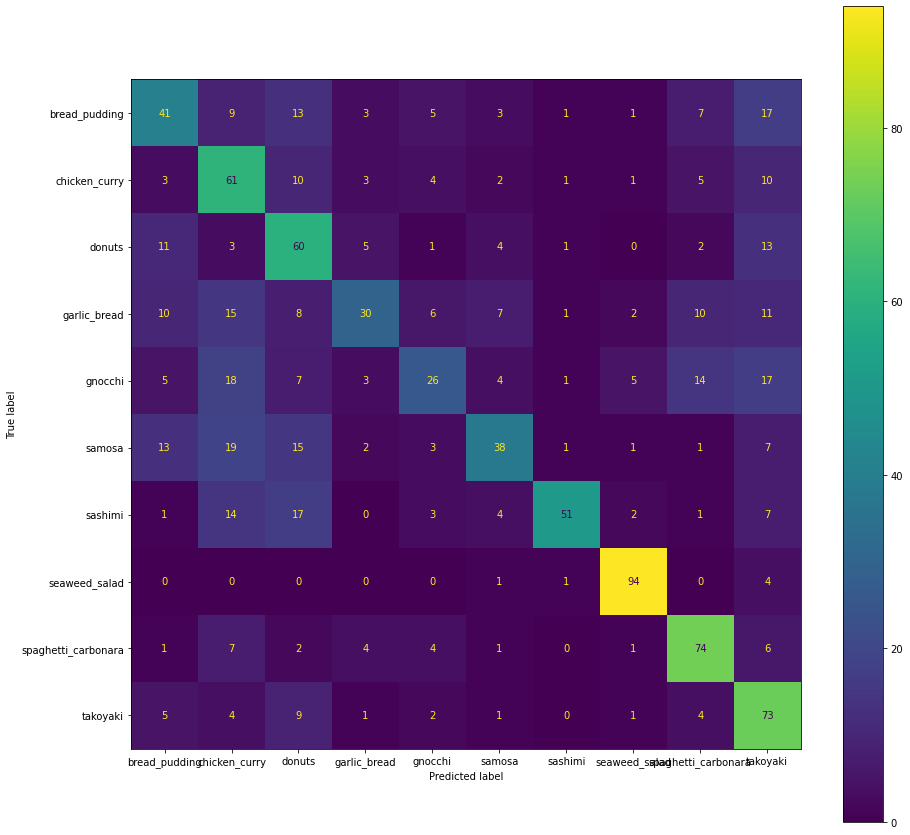

In [ ]:
plt.figure(figsize=(15,15))
ax = plt.subplot(1,1,1)
resnet_cm = confusion_matrix(resnet_y_true, resnet_y_pred)
disp = ConfusionMatrixDisplay(resnet_cm, display_labels=class_names)
disp.plot(ax=ax)
plt.show()

In [ ]:
print(classification_report(resnet_y_true, resnet_y_pred))

                     precision    recall  f1-score   support

      bread_pudding       0.46      0.41      0.43       100
      chicken_curry       0.41      0.61      0.49       100
             donuts       0.43      0.60      0.50       100
       garlic_bread       0.59      0.30      0.40       100
            gnocchi       0.48      0.26      0.34       100
             samosa       0.58      0.38      0.46       100
            sashimi       0.88      0.51      0.65       100
      seaweed_salad       0.87      0.94      0.90       100
spaghetti_carbonara       0.63      0.74      0.68       100
           takoyaki       0.44      0.73      0.55       100

           accuracy                           0.55      1000
          macro avg       0.58      0.55      0.54      1000
       weighted avg       0.58      0.55      0.54      1000



# Picking Random Data Testing

In [ ]:
# Import Library

import random
import os
import shutil

In [ ]:
# File Paths

food_data_path = '/content/drive/Shareddrives/Meng-emel/food-101 data'
test_data_path = '/content/drive/Shareddrives/Meng-emel/testing data'

In [ ]:
# Load Directories

list_food = os.listdir(food_data_path)
list_datatest = os.listdir(test_data_path)

In [ ]:
# Choose 10% from 1000 images in each folder for data test
# DO NOT RUN THIS CELL

# for food in list_food:
#   temp = os.listdir(food_data_path + '/' + food)
#   samples = random.sample(temp, 100)
#   for sample in samples:
#     original = food_data_path + '/' + food + '/' + sample
#     target = test_data_path + '/' + food + '_' + sample
#     shutil.copyfile(original, target)
#     os.remove(original)

In [ ]:
print(len(os.listdir(test_data_path)))
print(len(list(data_dir.glob('*/*.jpg'))))

1000
9000
